In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

# 1. 데이터 불러오기

In [2]:
dftrain = pd.read_stata('lendingclub_train.dta') #STATA
dftrain

index  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0       1027571      12000        12000          12000.0    0.0789   
1         46603      14000        14000          14000.0    0.1147   
2         40908      24000        24000          24000.0    0.1147   
3        182450      14000        14000          14000.0    0.0949   
4        868323      14000        14000          14000.0    0.0999   
...         ...        ...          ...              ...       ...   
874330   480114      32000        32000          32000.0    0.1875   
874331  1027649      24000        24000          24000.0    0.0692   
874332   773937       4000         4000           4000.0    0.0662   
874333    87618       8000         8000           8000.0    0.1288   
874334   296586       8000         8000           8000.0    0.1149   

        installment  annual_inc    dti  delinq_2yrs  fico_range_low  ...  \
0            375.43     90641.0  10.20            0             690  ...   
1            461.47     46000.0  17.40            1             670  ...   
2            791.09     90000.0  11.73            2             660  ...   
3            448.40    115000.0   7.31            0             660  ...   
4            451.68     78000.0  24.32            0             685  ...   
...             ...         ...    ...          ...             ...  ...   
874330       825.71     90000.0  27.39            0             735  ...   
874331       740.18     76000.0  34.20            0             685  ...   
874332       122.82     24960.0  25.29            0             790  ...   
874333       269.09     53000.0  18.07            2             680  ...   
874334       263.78     77000.0  18.02            1             675  ...   

        mths_since_recent_revol_delinq2  mths_since_recent_revol_delinq3  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
874330                                0                                0   
874331                                0                                0   
874332                                0                                0   
874333                                0                                0   
874334                                0                                0   

        mths_since_recent_revol_delinq4  mths_since_recent_revol_delinq5  \
0                                     0                                0   
1                                     0                                1   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
874330                                0                                0   
874331                                0                                0   
874332                                0                                0   
874333                                0                                1   
874334                                0                                0   

        mths_since_recent_revol_delinq6  mths_since_recent_revol_delinq7  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0           

In [3]:
dftest = pd.read_stata('lendingclub_test.dta') #STATA
dftest

index  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0       762086       7500         7500           7475.0    0.0890   
1       274916      26250        26250          26200.0    0.1999   
2        36864      35000        35000          34750.0    0.1147   
3       441688       6000         6000           6000.0    0.1064   
4       479052      14000        14000          14000.0    0.1580   
...        ...        ...          ...              ...       ...   
218579  821800      10000        10000          10000.0    0.0624   
218580  464764       6000         6000           6000.0    0.2031   
218581  256939      20000        20000          20000.0    0.1274   
218582  771830      17000        17000          17000.0    0.1199   
218583  671939      16000        16000          16000.0    0.0839   

        installment  annual_inc    dti  delinq_2yrs  fico_range_low  ...  \
0            238.15     65000.0  22.47            1             690  ...   
1            975.42     73216.0  33.11            0             710  ...   
2           1153.67    160000.0  21.31            0             685  ...   
3            195.42     40000.0  16.53            0             685  ...   
4            338.97    105000.0   7.56            0             675  ...   
...             ...         ...    ...          ...             ...  ...   
218579       305.31     95000.0  12.65            0             695  ...   
218580       223.94     50000.0  13.42            0             680  ...   
218581       671.38     70000.0  12.64            0             700  ...   
218582       564.57     72000.0  16.87            2             665  ...   
218583       504.27    105000.0  16.90            0             695  ...   

        mths_since_recent_revol_delinq2  mths_since_recent_revol_delinq3  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
218579                                0                                0   
218580                                0                                0   
218581                                0                                0   
218582                                0                                0   
218583                                0                                0   

        mths_since_recent_revol_delinq4  mths_since_recent_revol_delinq5  \
0                                     1                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
218579                                0                                0   
218580                                0                                0   
218581                                0                                0   
218582                                0                                0   
218583                                0                                0   

        mths_since_recent_revol_delinq6  mths_since_recent_revol_delinq7  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                      

# 2. 변수 처리

## 상관관계 보기

### 전체 변수

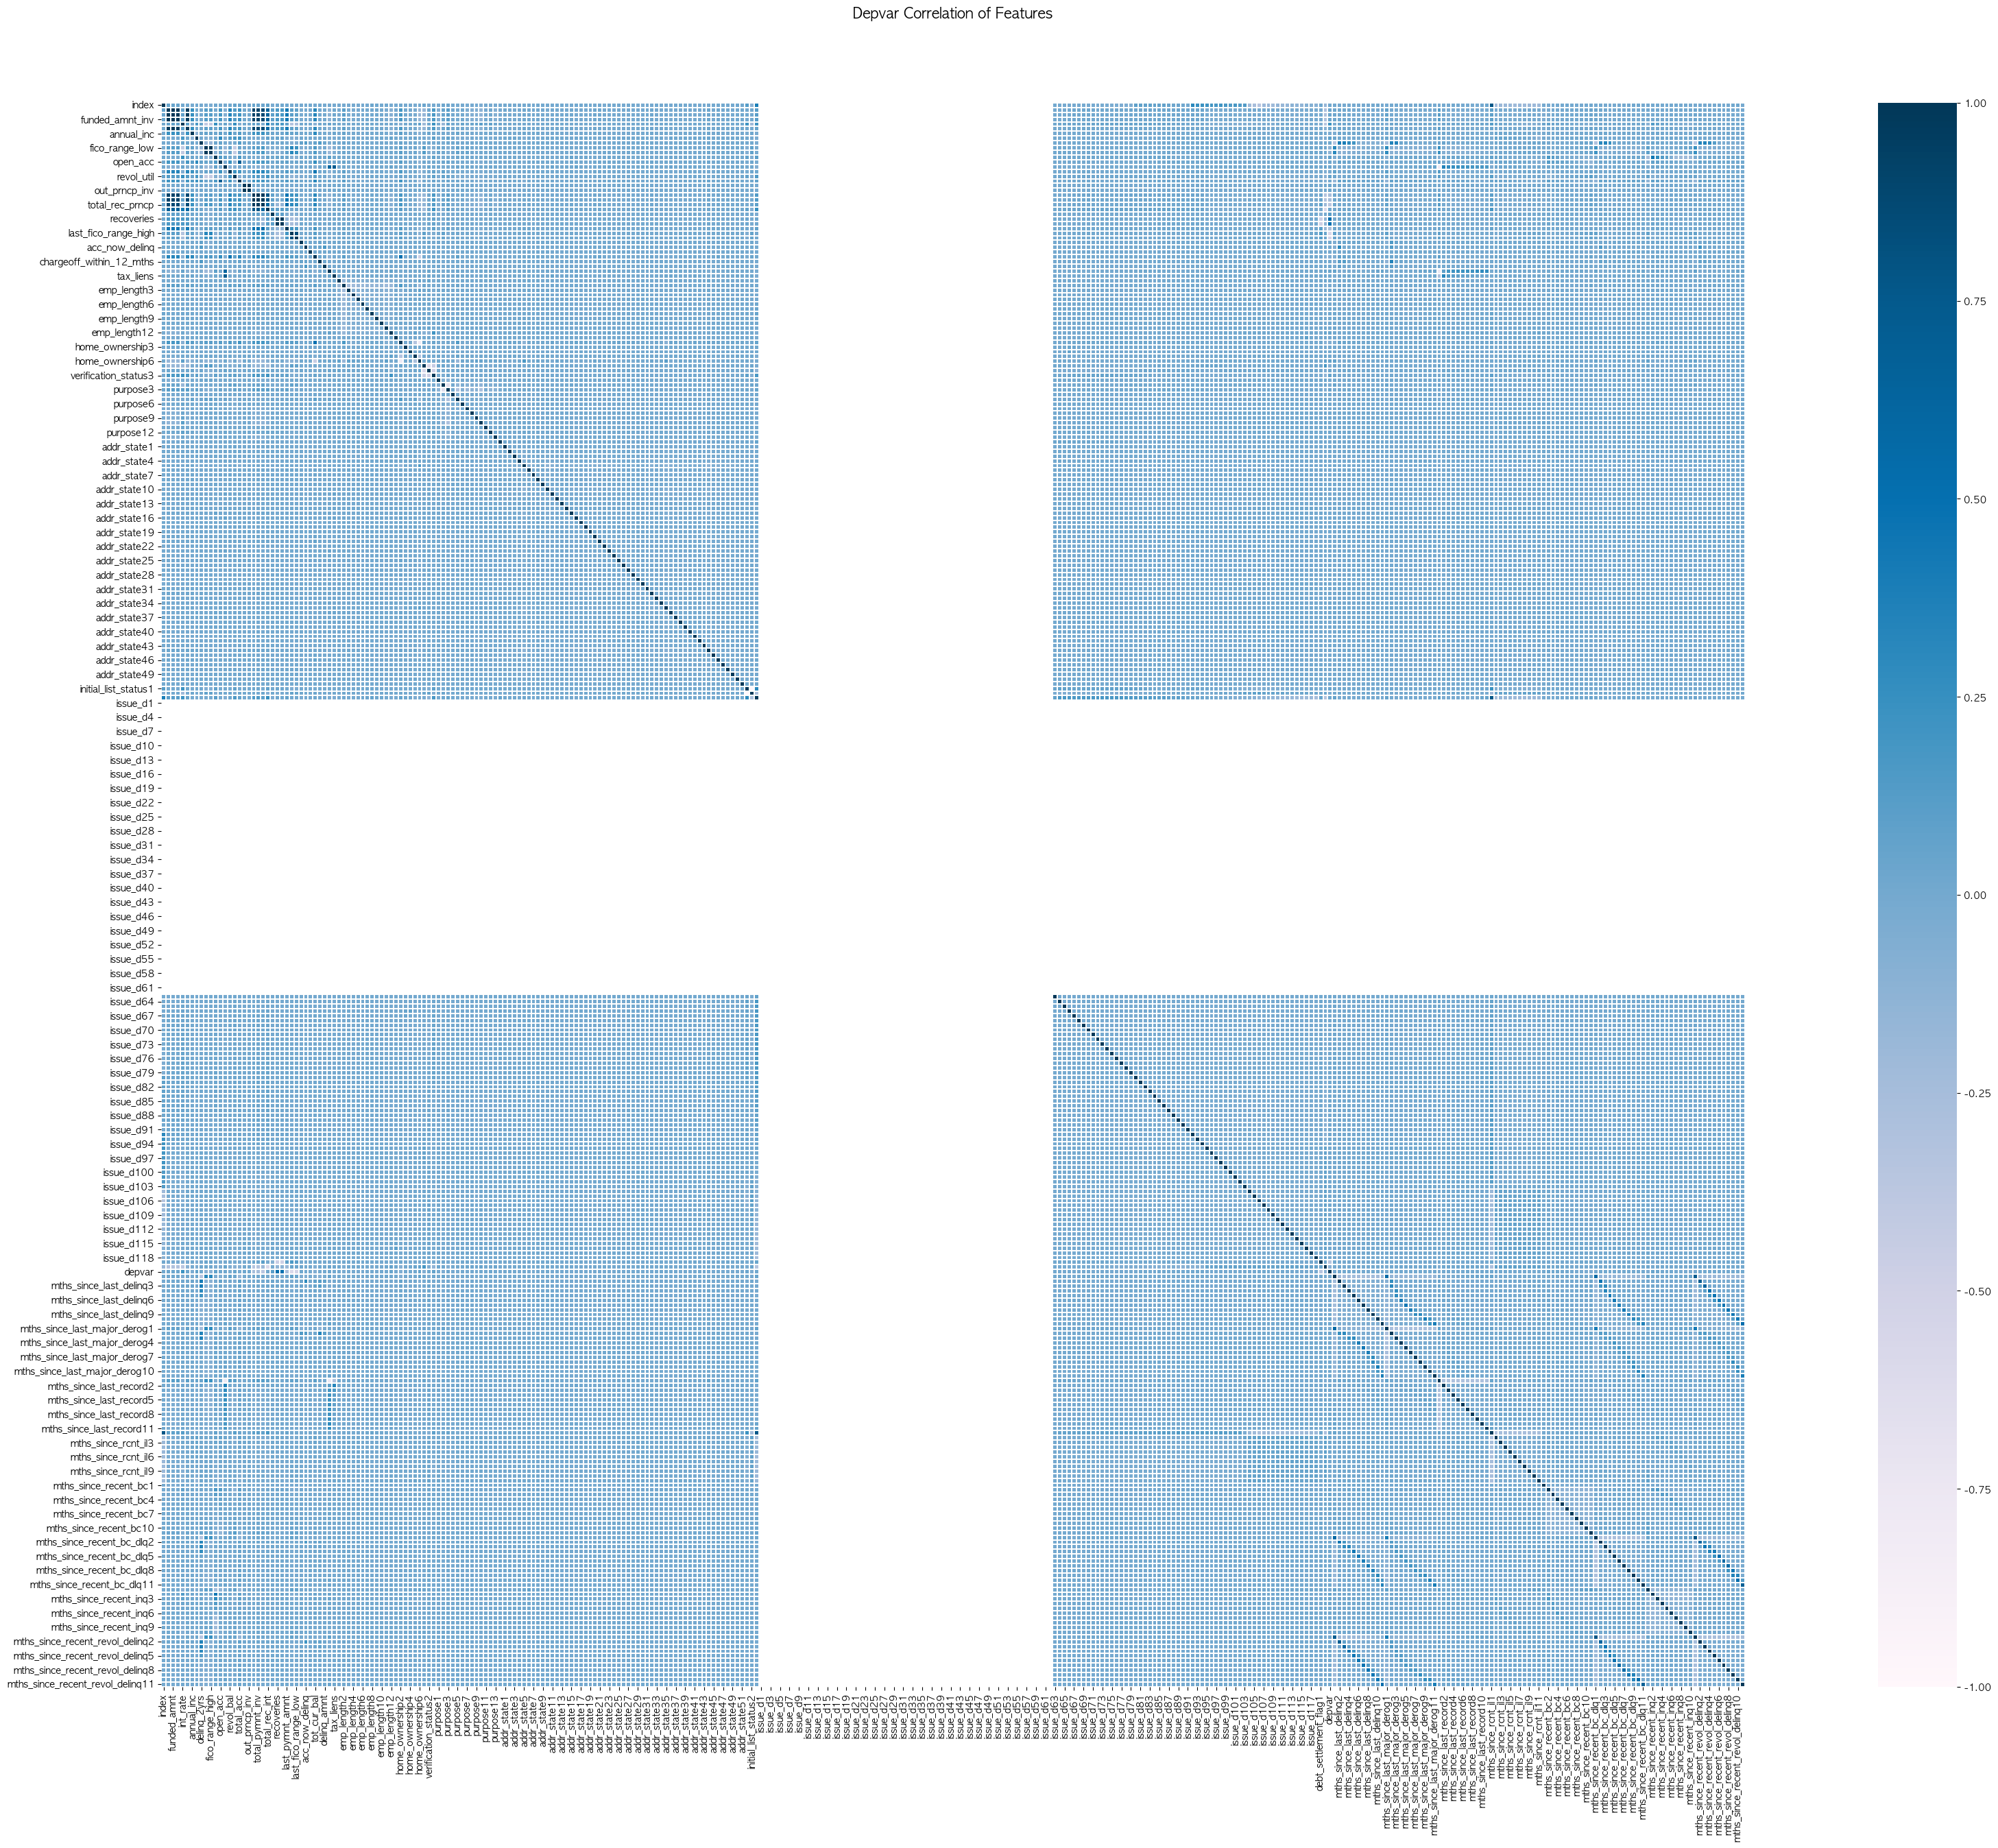

In [4]:
colormap = plt.cm.PuBu
plt.figure(figsize=(50, 30))
plt.title("Depvar Correlation of Features", y = 1.05, size = 15)
sns.heatmap(dftrain.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = False)
plt.show()

### 연속형 변수

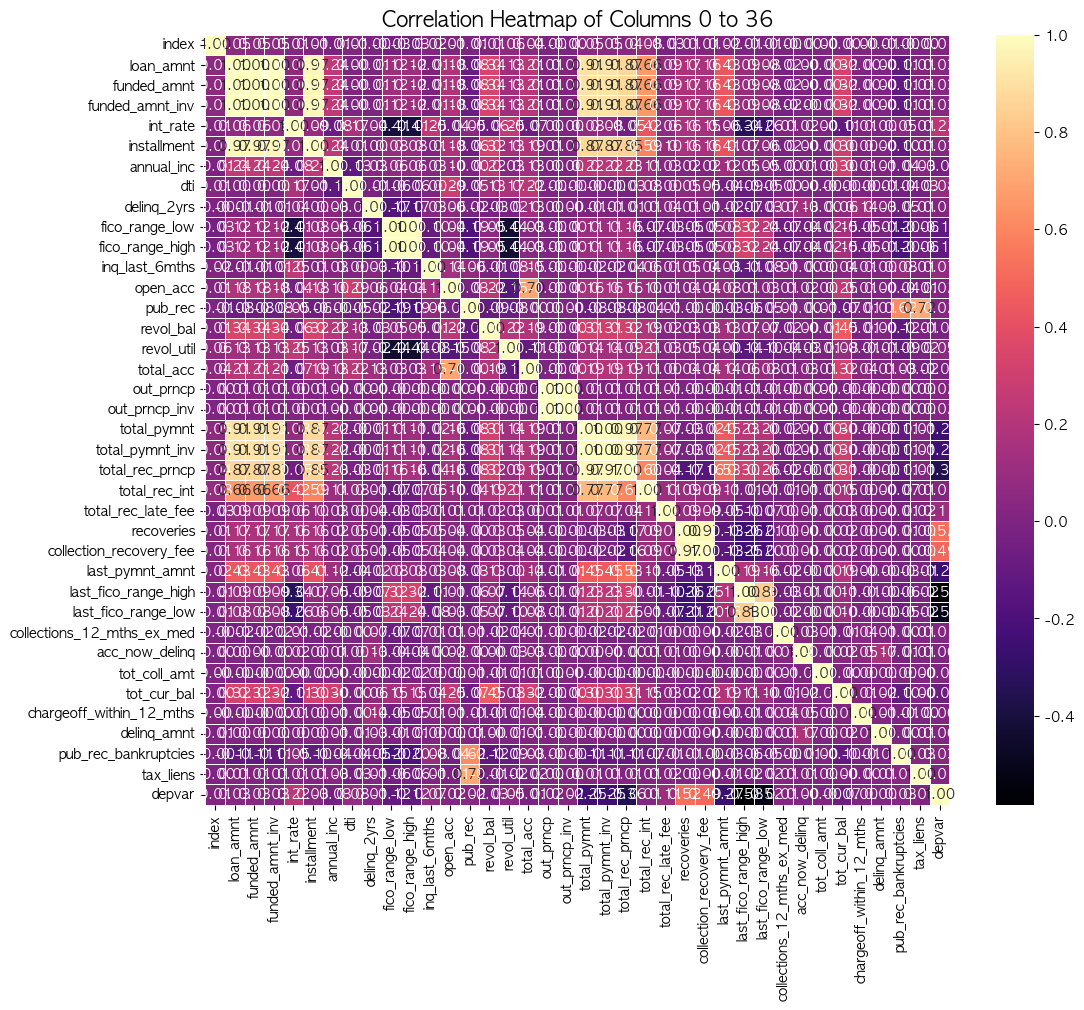

In [5]:
df_subset = dftrain.iloc[:, :37]
df_subset['depvar'] = dftrain['depvar']

plt.figure(figsize=(12, 10))
plt.title("Correlation Heatmap of Columns 0 to 36", size=15)
sns.heatmap(df_subset.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.show()

### 더미형 변수

In [6]:
def get_corr(*cols):
    # 데이터프레임 df에서 선택된 컬럼들로 새로운 데이터프레임 만들기
    selected_cols_df = dftrain[list(cols)]

    # 상관관계 계산
    corr_matrix = selected_cols_df.corr()

    # 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
    plt.title(cols)
    #plt.savefig(f'{cols[1]}.png', dpi=400)
    plt.show()

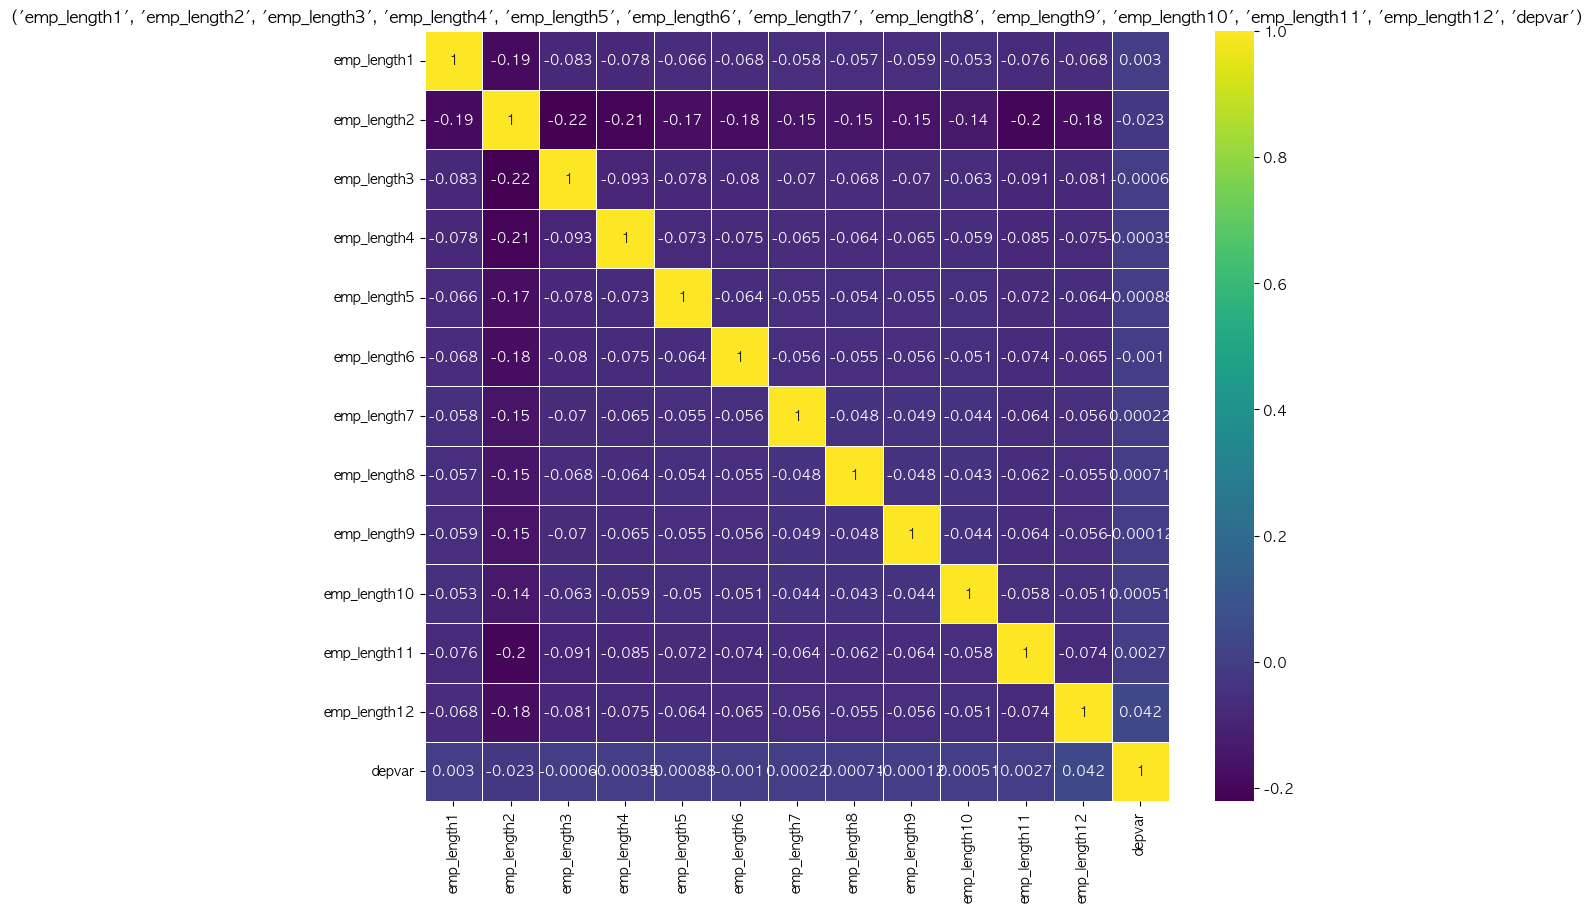

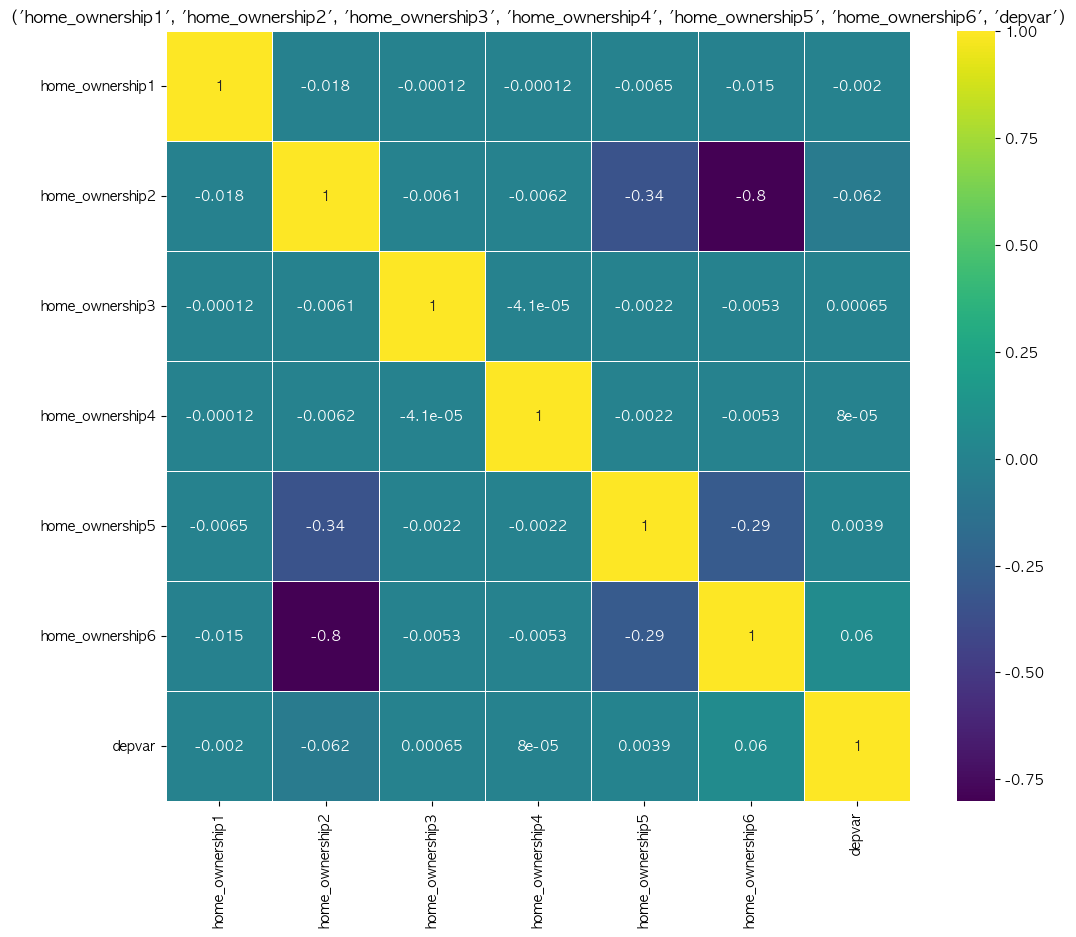

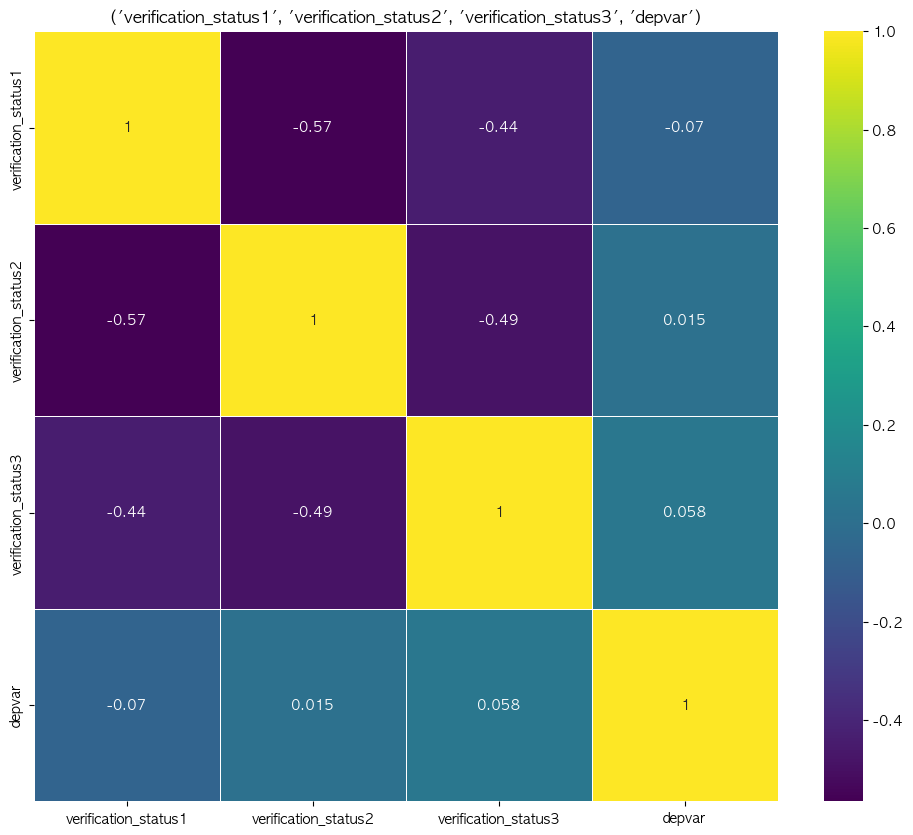

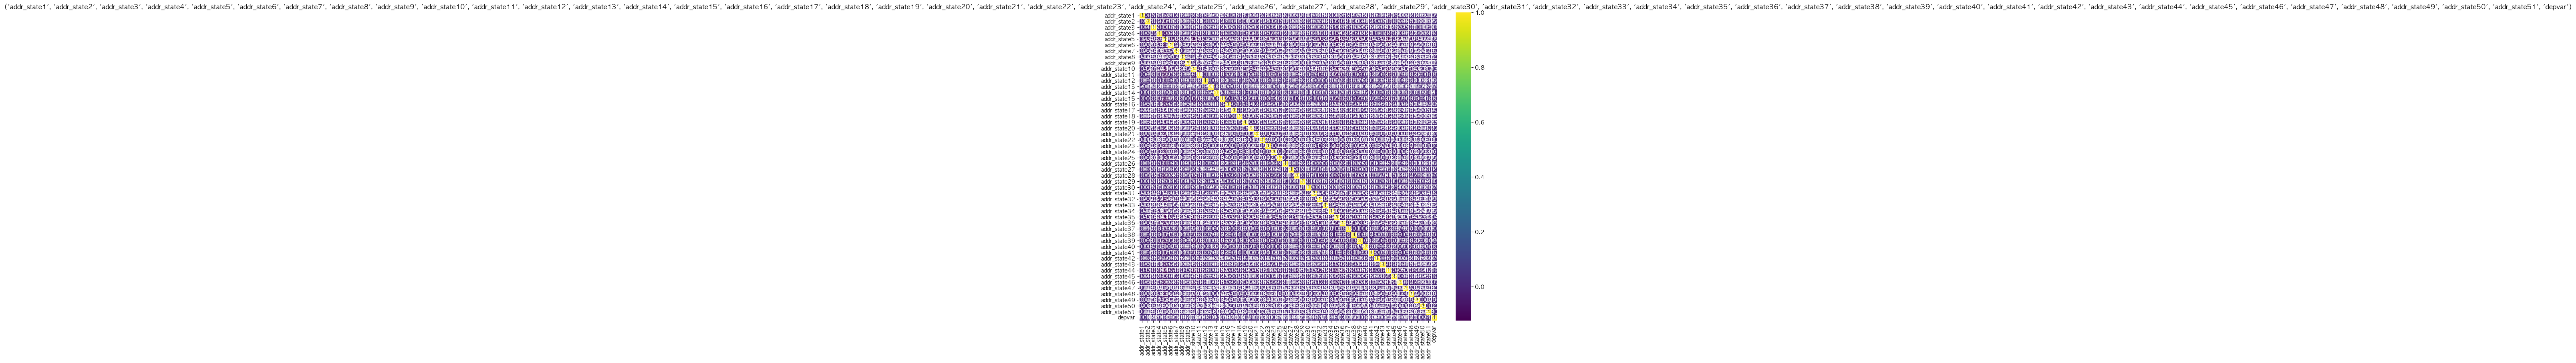

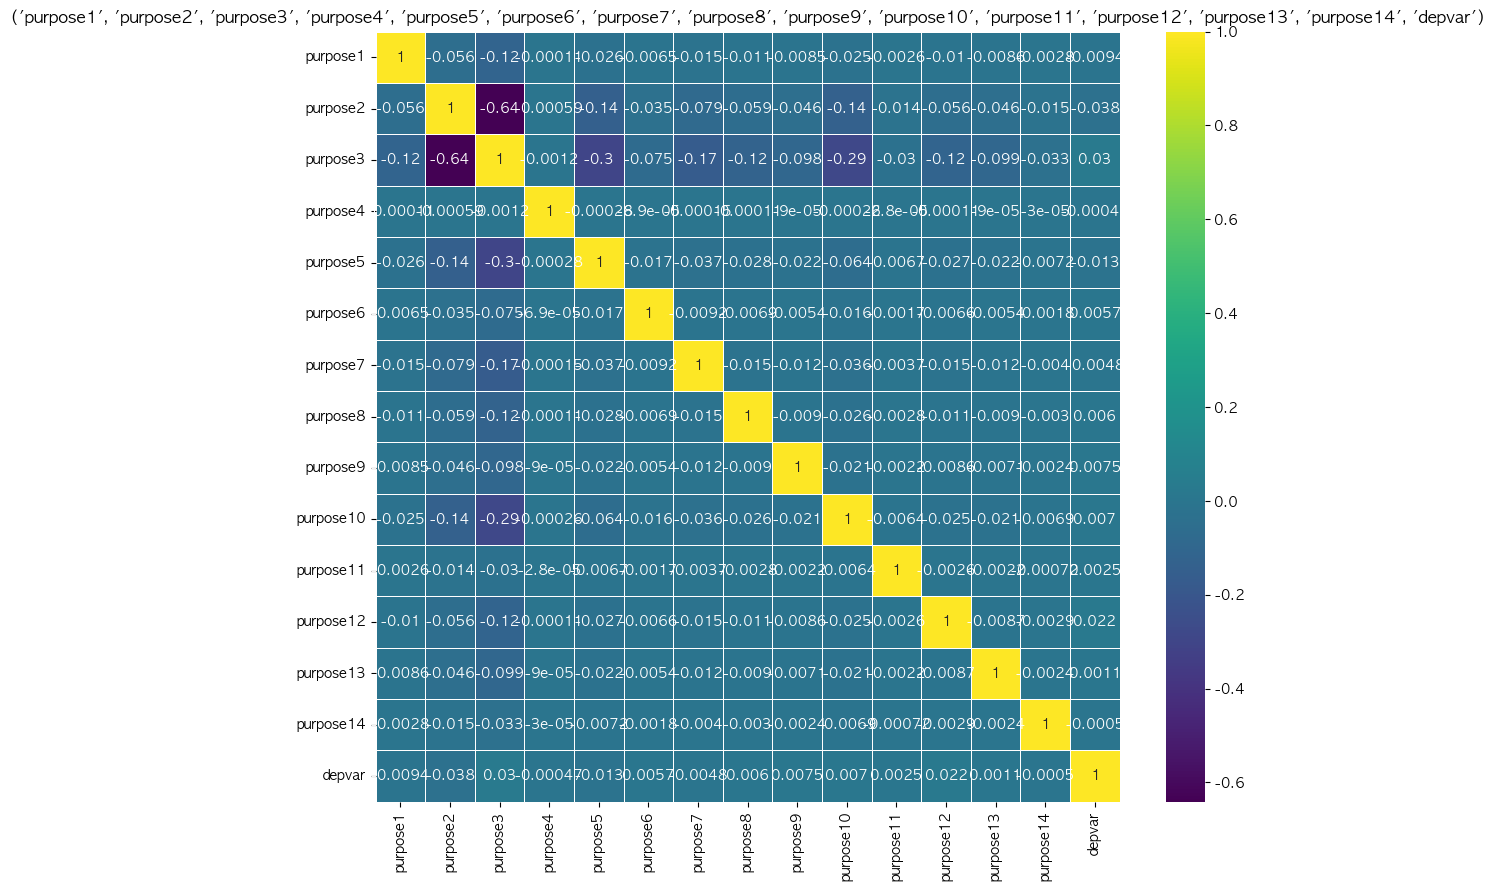

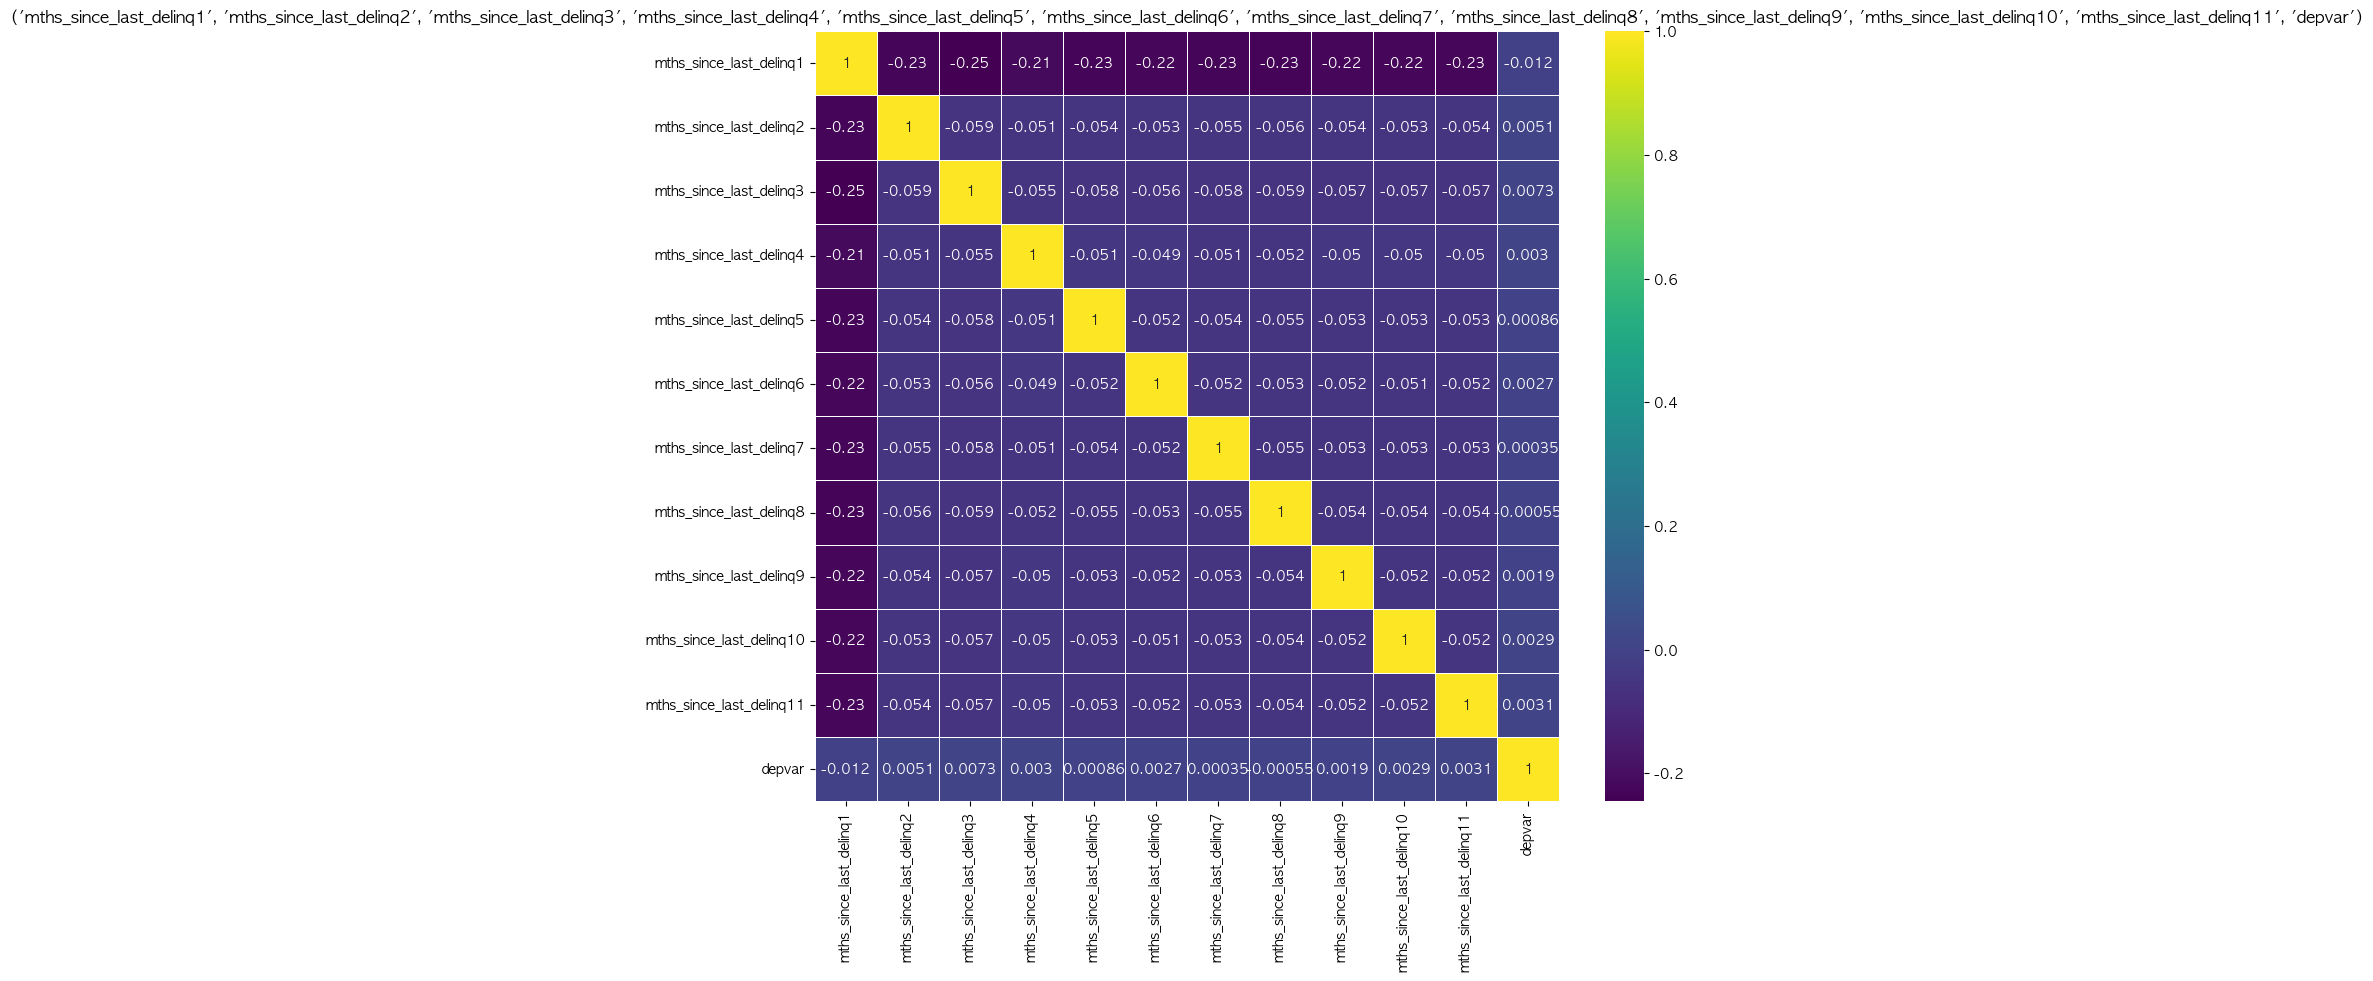

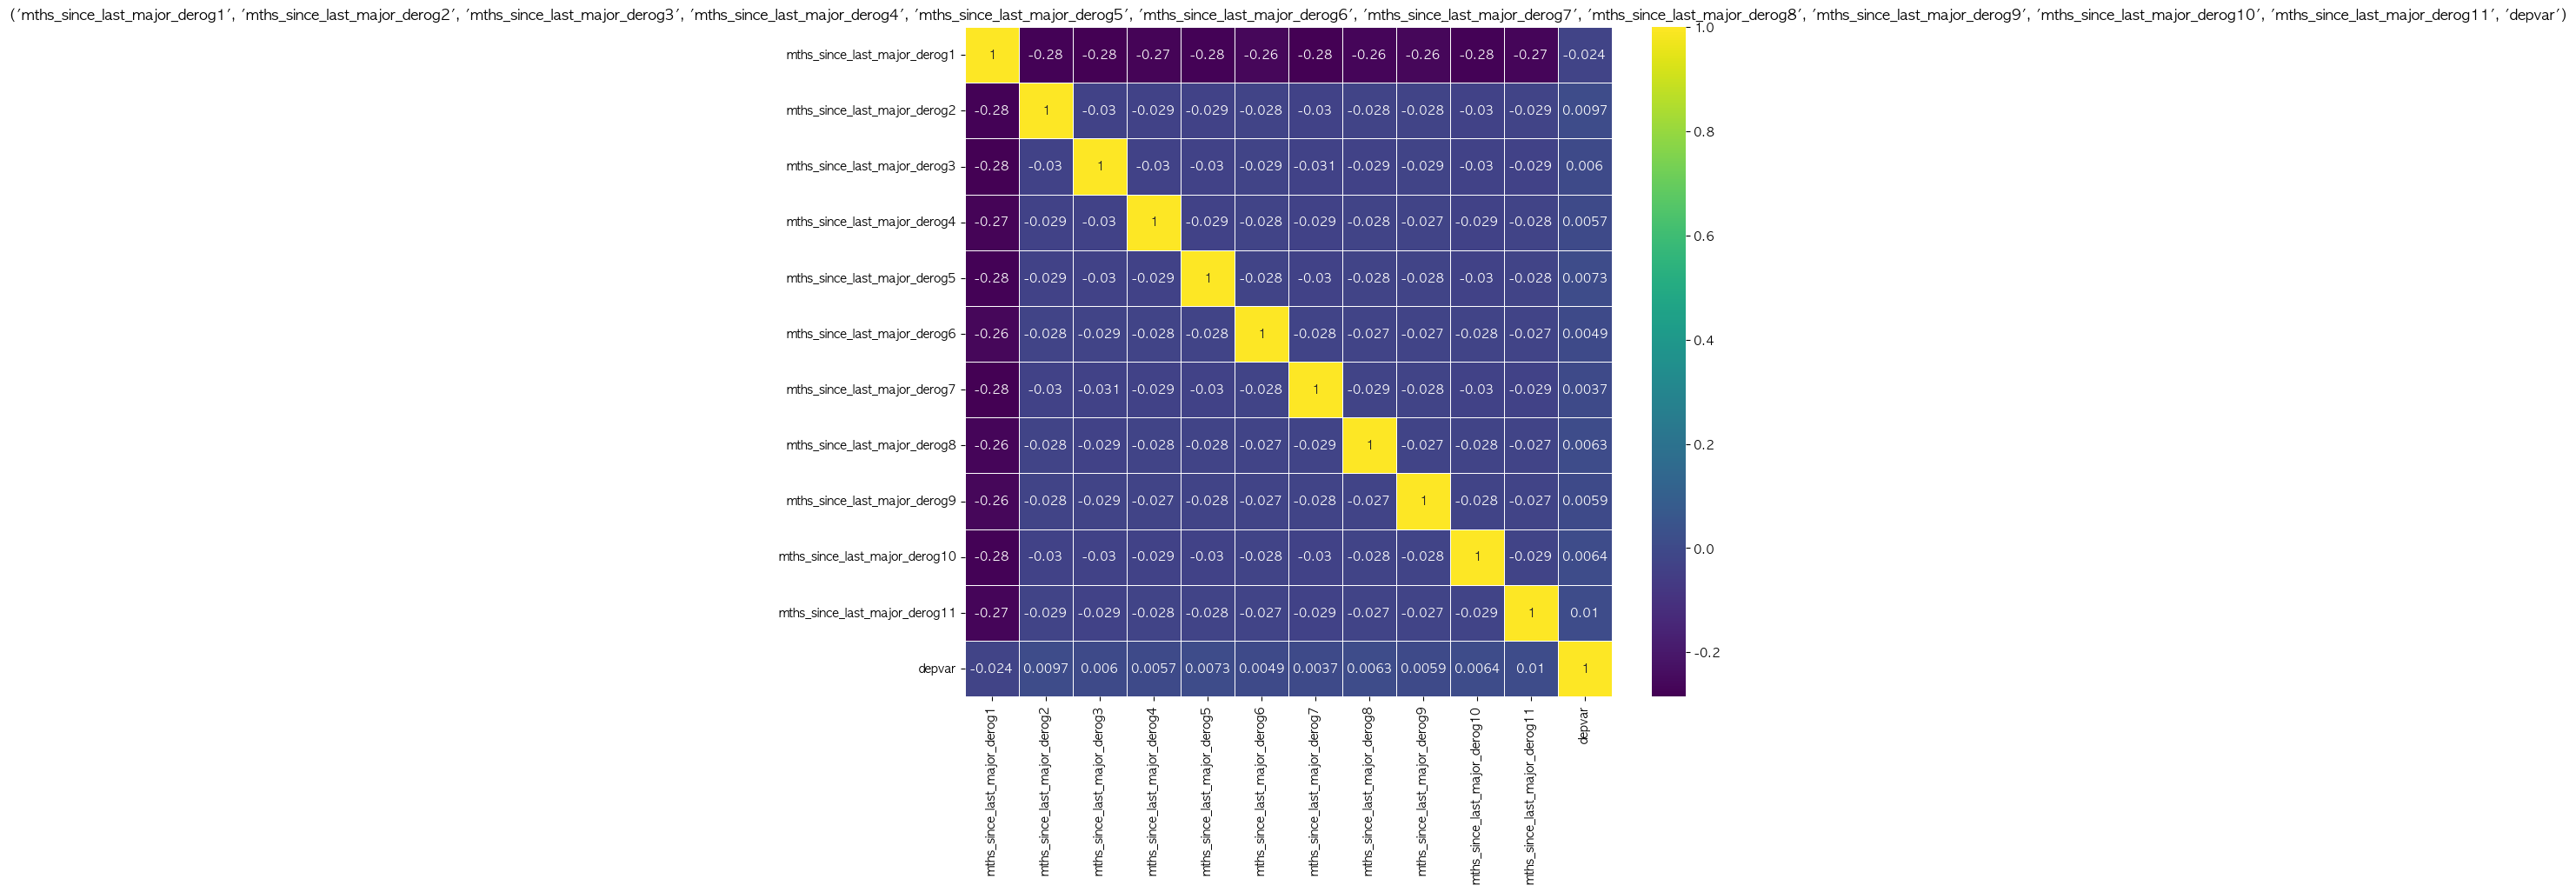

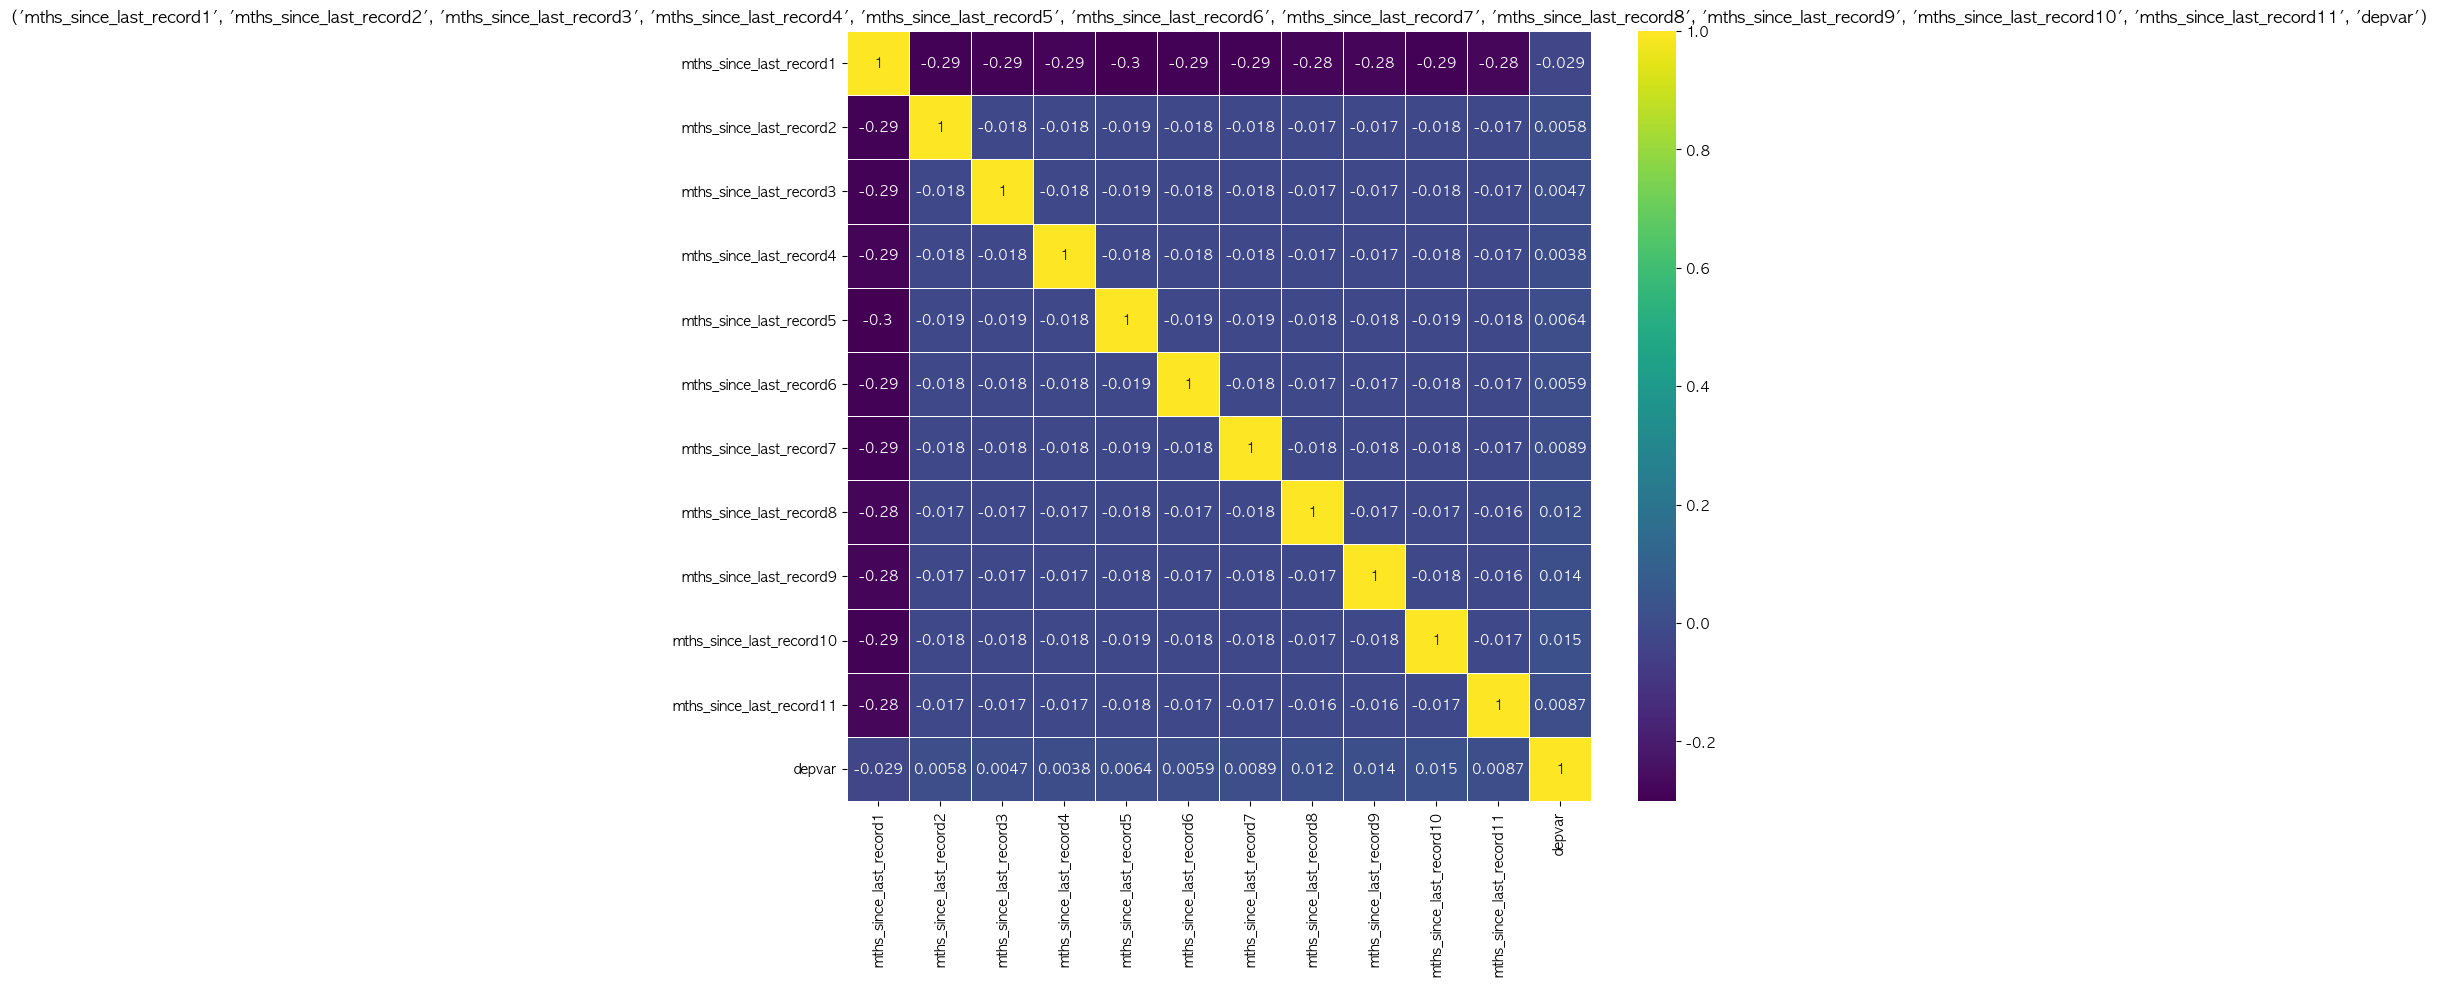

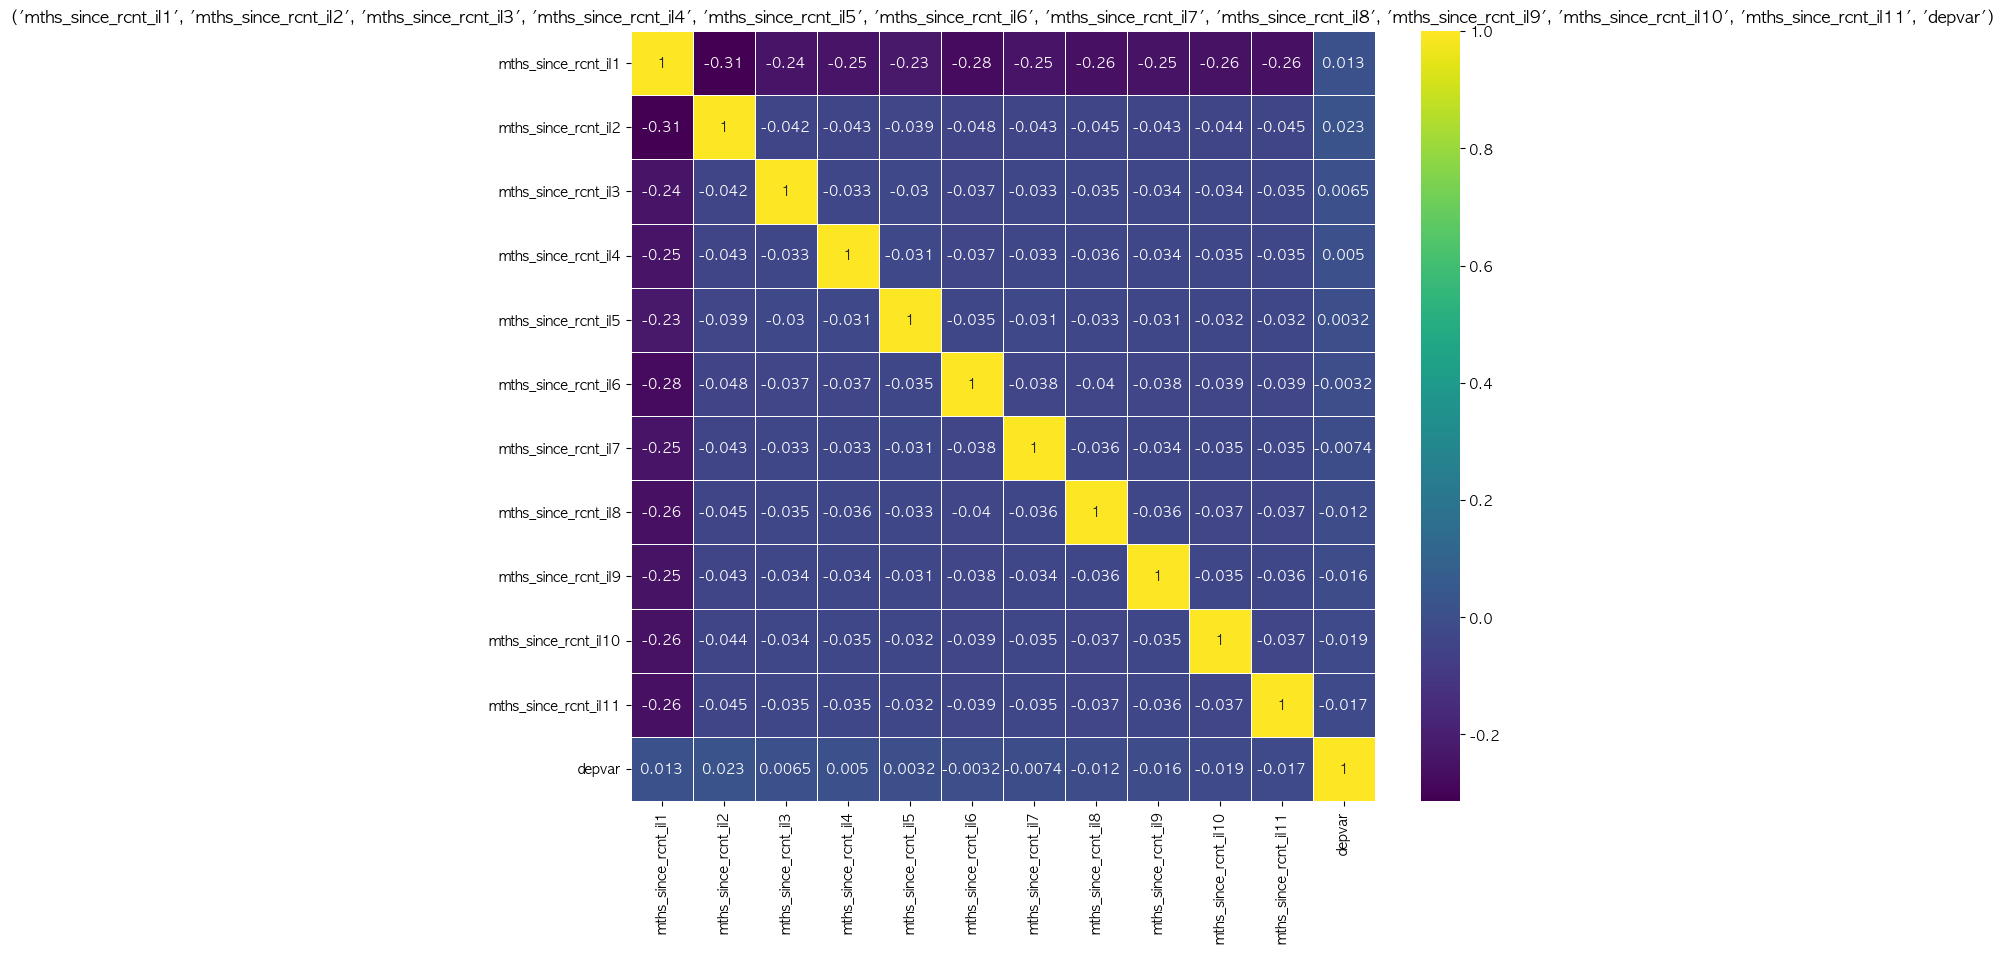

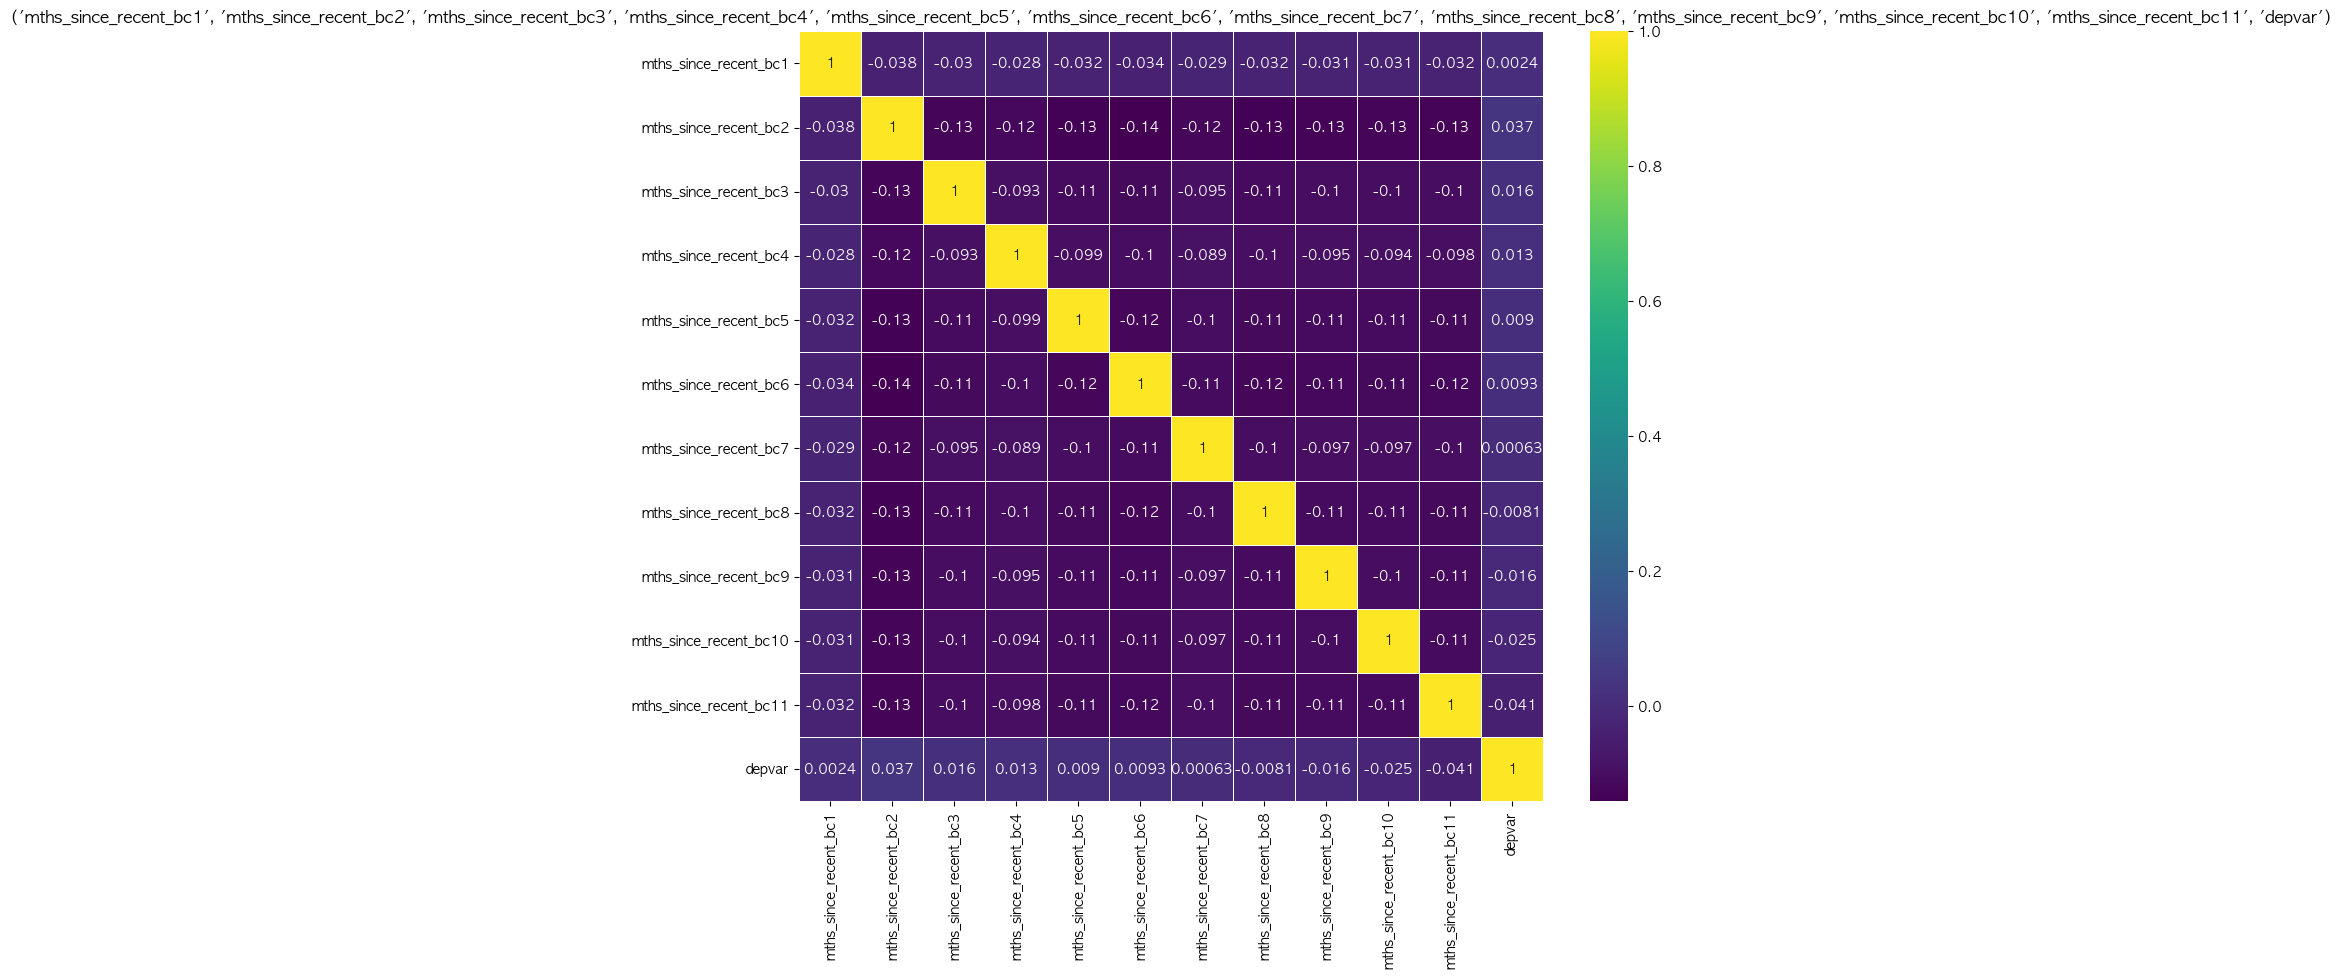

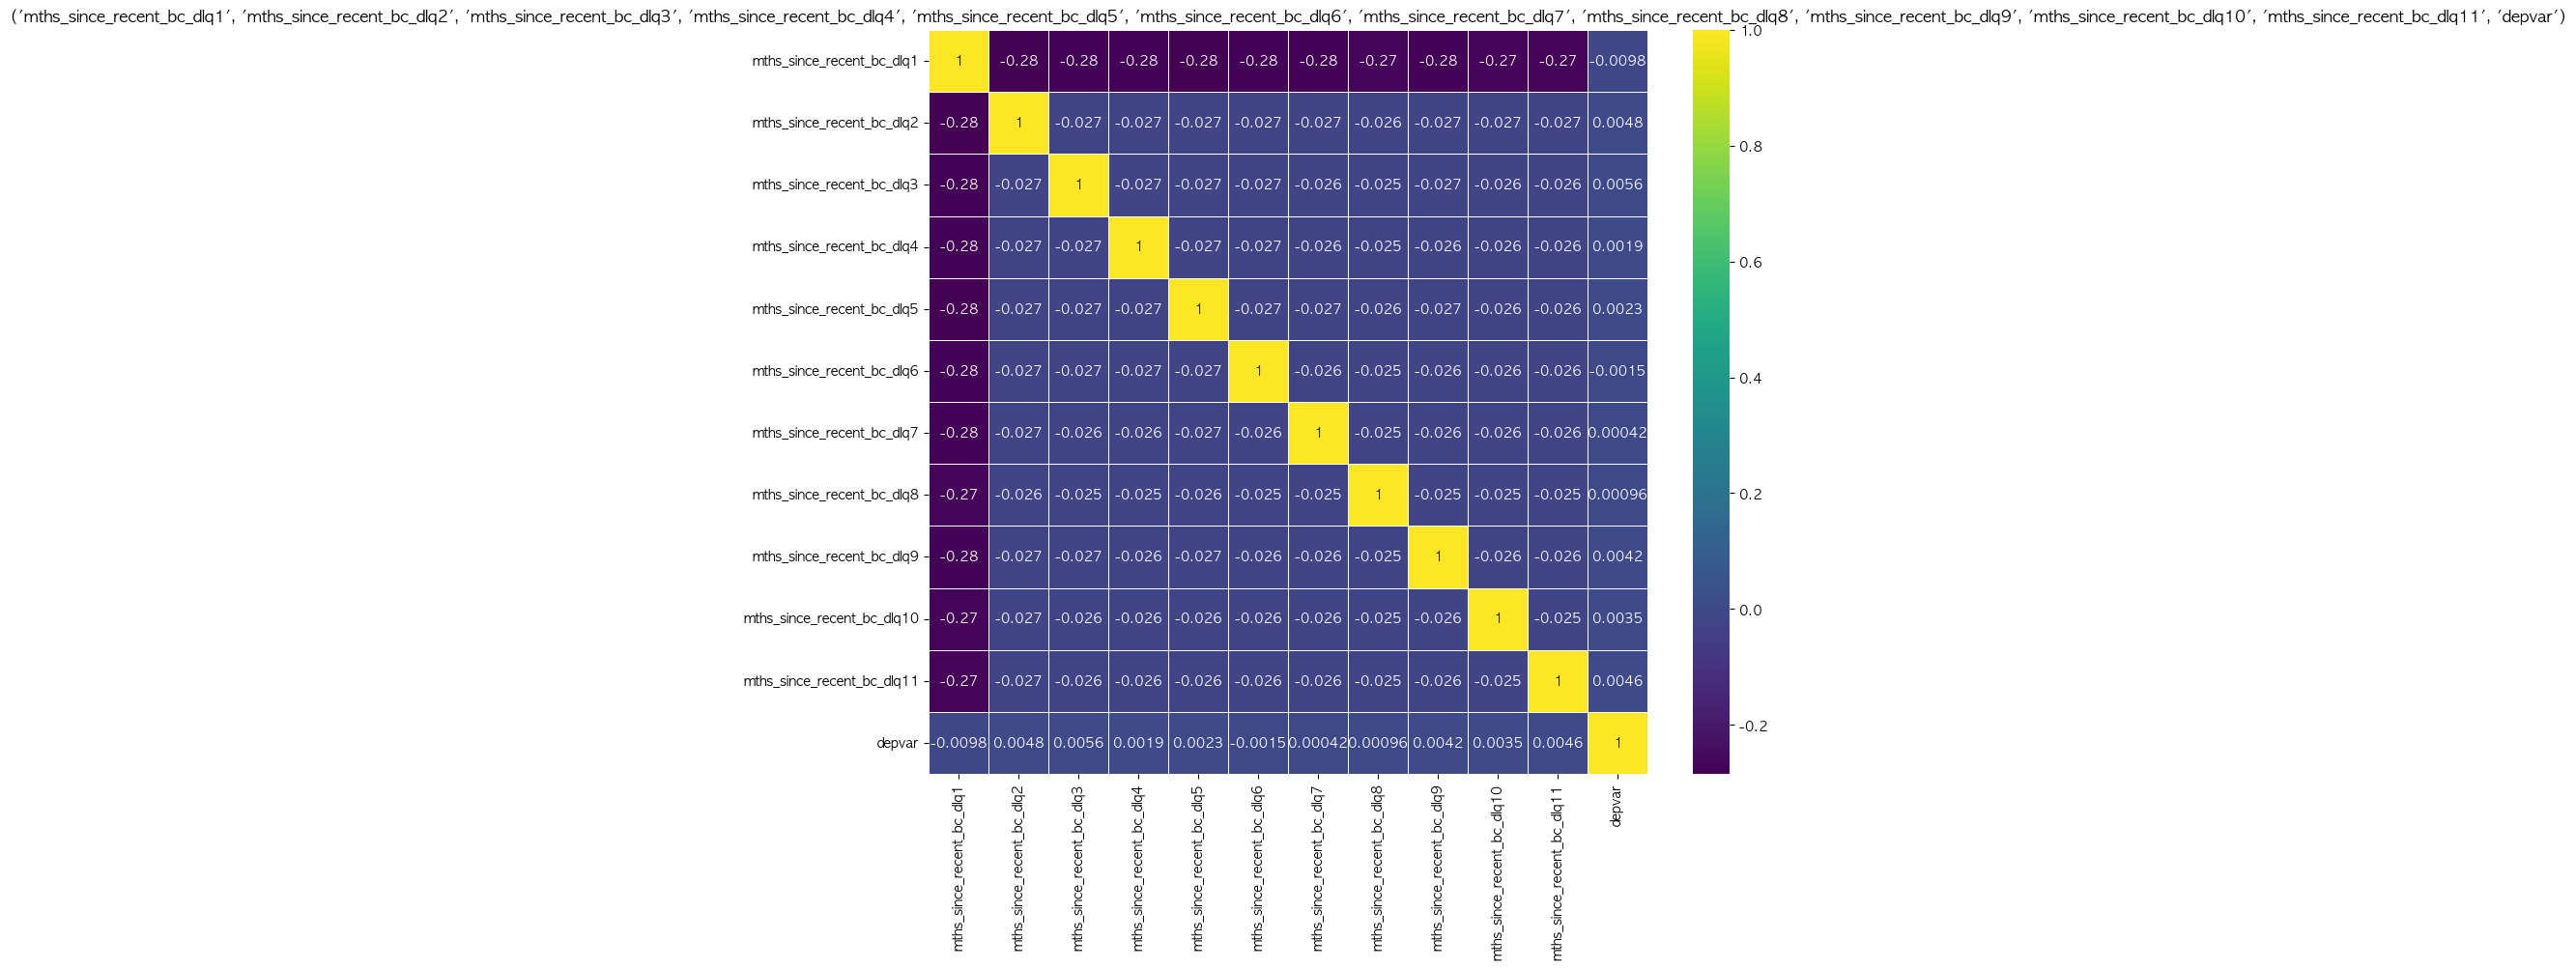

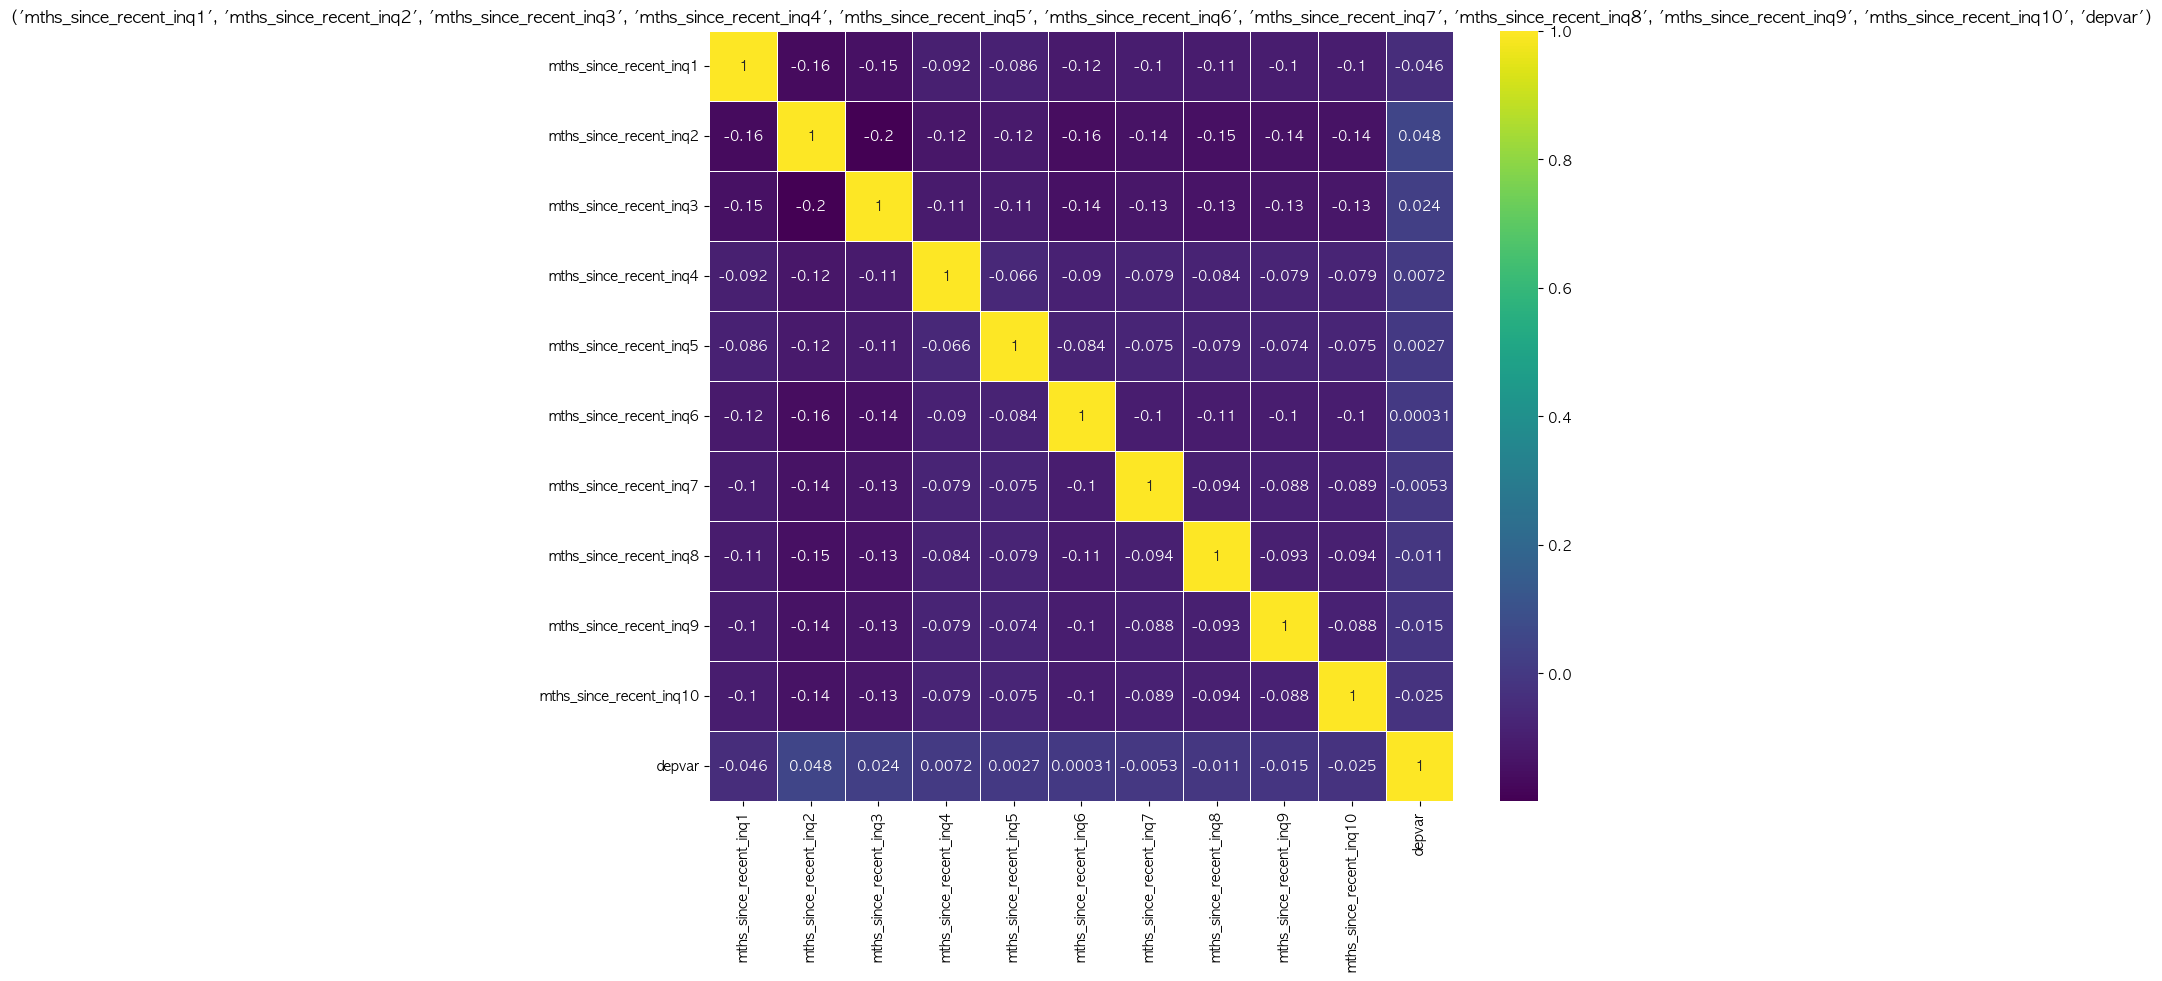

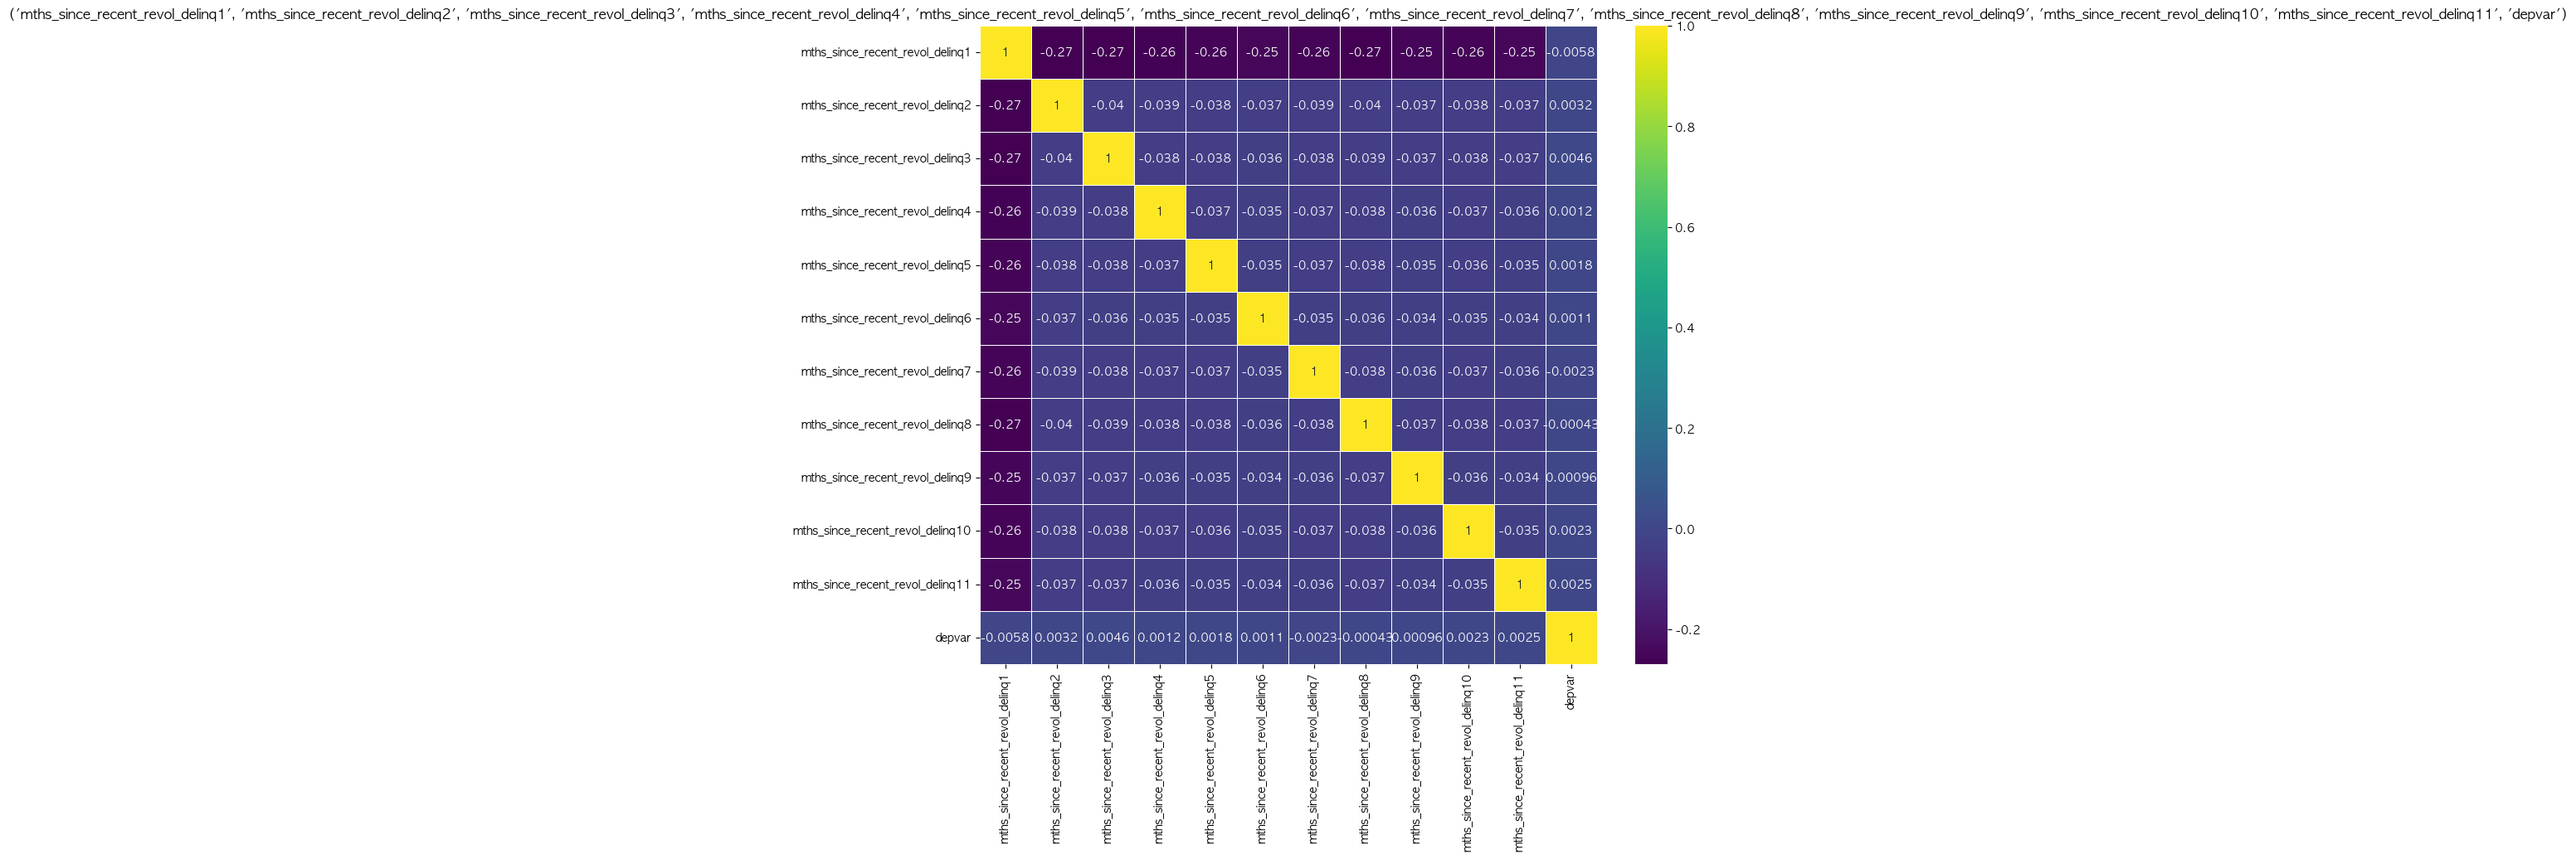

In [7]:
# 더미변수만 상관관계 확인
get_corr('emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12','depvar')

get_corr( 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6','depvar')

get_corr('verification_status1',
 'verification_status2',
 'verification_status3','depvar')

get_corr( 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'addr_state19',
 'addr_state20',
 'addr_state21',
 'addr_state22',
 'addr_state23',
 'addr_state24',
 'addr_state25',
 'addr_state26',
 'addr_state27',
 'addr_state28',
 'addr_state29',
 'addr_state30',
 'addr_state31',
 'addr_state32',
 'addr_state33',
 'addr_state34',
 'addr_state35',
 'addr_state36',
 'addr_state37',
 'addr_state38',
 'addr_state39',
 'addr_state40',
 'addr_state41',
 'addr_state42',
 'addr_state43',
 'addr_state44',
 'addr_state45',
 'addr_state46',
 'addr_state47',
 'addr_state48',
 'addr_state49',
 'addr_state50',
 'addr_state51','depvar')

get_corr('purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14','depvar')

get_corr('mths_since_last_delinq1',
 'mths_since_last_delinq2',
 'mths_since_last_delinq3',
 'mths_since_last_delinq4',
 'mths_since_last_delinq5',
 'mths_since_last_delinq6',
 'mths_since_last_delinq7',
 'mths_since_last_delinq8',
 'mths_since_last_delinq9',
 'mths_since_last_delinq10',
 'mths_since_last_delinq11','depvar')

get_corr('mths_since_last_major_derog1',
 'mths_since_last_major_derog2',
 'mths_since_last_major_derog3',
 'mths_since_last_major_derog4',
 'mths_since_last_major_derog5',
 'mths_since_last_major_derog6',
 'mths_since_last_major_derog7',
 'mths_since_last_major_derog8',
 'mths_since_last_major_derog9',
 'mths_since_last_major_derog10',
 'mths_since_last_major_derog11','depvar')

get_corr('mths_since_last_record1',
 'mths_since_last_record2',
 'mths_since_last_record3',
 'mths_since_last_record4',
 'mths_since_last_record5',
 'mths_since_last_record6',
 'mths_since_last_record7',
 'mths_since_last_record8',
 'mths_since_last_record9',
 'mths_since_last_record10',
 'mths_since_last_record11','depvar')

get_corr('mths_since_rcnt_il1',
 'mths_since_rcnt_il2',
 'mths_since_rcnt_il3',
 'mths_since_rcnt_il4',
 'mths_since_rcnt_il5',
 'mths_since_rcnt_il6',
 'mths_since_rcnt_il7',
 'mths_since_rcnt_il8',
 'mths_since_rcnt_il9',
  'mths_since_rcnt_il10',
 'mths_since_rcnt_il11','depvar')

get_corr('mths_since_recent_bc1',
 'mths_since_recent_bc2',
 'mths_since_recent_bc3',
 'mths_since_recent_bc4',
 'mths_since_recent_bc5',
 'mths_since_recent_bc6',
 'mths_since_recent_bc7',
 'mths_since_recent_bc8',
 'mths_since_recent_bc9',
 'mths_since_recent_bc10',
 'mths_since_recent_bc11','depvar')

get_corr( 'mths_since_recent_bc_dlq1',
 'mths_since_recent_bc_dlq2',
 'mths_since_recent_bc_dlq3',
 'mths_since_recent_bc_dlq4',
 'mths_since_recent_bc_dlq5',
 'mths_since_recent_bc_dlq6',
 'mths_since_recent_bc_dlq7',
 'mths_since_recent_bc_dlq8',
 'mths_since_recent_bc_dlq9',
 'mths_since_recent_bc_dlq10',
 'mths_since_recent_bc_dlq11','depvar')

get_corr('mths_since_recent_inq1',
 'mths_since_recent_inq2',
 'mths_since_recent_inq3',
 'mths_since_recent_inq4',
 'mths_since_recent_inq5',
 'mths_since_recent_inq6',
 'mths_since_recent_inq7',
 'mths_since_recent_inq8',
 'mths_since_recent_inq9',
 'mths_since_recent_inq10','depvar'
)

get_corr( 'mths_since_recent_revol_delinq1',
 'mths_since_recent_revol_delinq2',
 'mths_since_recent_revol_delinq3',
 'mths_since_recent_revol_delinq4',
 'mths_since_recent_revol_delinq5',
 'mths_since_recent_revol_delinq6',
 'mths_since_recent_revol_delinq7',
 'mths_since_recent_revol_delinq8',
 'mths_since_recent_revol_delinq9',
 'mths_since_recent_revol_delinq10',
 'mths_since_recent_revol_delinq11','depvar')

## 특성 조합 = 새 column
- 상관관계가 유의미한 특성을 만들기 위함

In [8]:
# 특성 조합(train)
dftrain['fico_score_average'] = (dftrain['fico_range_low'] + dftrain['fico_range_high']) / 2
dftrain['loan_to_income_ratio'] = dftrain['loan_amnt'] / dftrain['annual_inc']
dftrain['delinquency_history'] = dftrain['delinq_2yrs'] + dftrain['acc_now_delinq'] + dftrain['chargeoff_within_12_mths']
dftrain["interactions_term_rate"] = dftrain["term1"] * dftrain["int_rate"]
dftrain["average_account_age"] = dftrain["elapsed_t"] / dftrain["total_acc"]
dftrain["late_payment_ratio"] = dftrain["delinq_2yrs"] / dftrain["total_acc"]
dftrain['fico_scor_change'] = (dftrain['fico_range_high'] +dftrain['fico_range_low'])/2 - (dftrain['last_fico_range_high'] + 
                                                                            dftrain['last_fico_range_low'])/2

# 특성 조합(test)
dftest['fico_score_average'] = (dftest['fico_range_low'] + dftest['fico_range_high']) / 2
dftest['loan_to_income_ratio'] = dftest['loan_amnt'] / dftest['annual_inc']
dftest['delinquency_history'] = dftest['delinq_2yrs'] + dftest['acc_now_delinq'] + dftest['chargeoff_within_12_mths']
dftest["interactions_term_rate"] = dftest["term1"] * dftest["int_rate"]
dftest["average_account_age"] = dftest["elapsed_t"] / dftest["total_acc"]
dftest["late_payment_ratio"] = dftest["delinq_2yrs"] / dftest["total_acc"]
dftest['fico_scor_change'] = (dftest['fico_range_high'] +dftest['fico_range_low'])/2 - (dftest['last_fico_range_high'] + 
                                                                            dftest['last_fico_range_low'])/2

/var/folders/ns/03rqz84x751076gqwcl43ps40000gn/T/ipykernel_13888/1972240647.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dftest['fico_score_average'] = (dftest['fico_range_low'] + dftest['fico_range_high']) / 2
/var/folders/ns/03rqz84x751076gqwcl43ps40000gn/T/ipykernel_13888/1972240647.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dftest['loan_to_income_ratio'] = dftest['loan_amnt'] / dftest['annual_inc']
/var/folders/ns/03rqz84x751076gqwcl43ps40000gn/T/ipykernel_13888/1972240647.py:14: PerformanceWarning: DataFra

<Axes: title={'center': 'Depvar Correlation of Features'}>

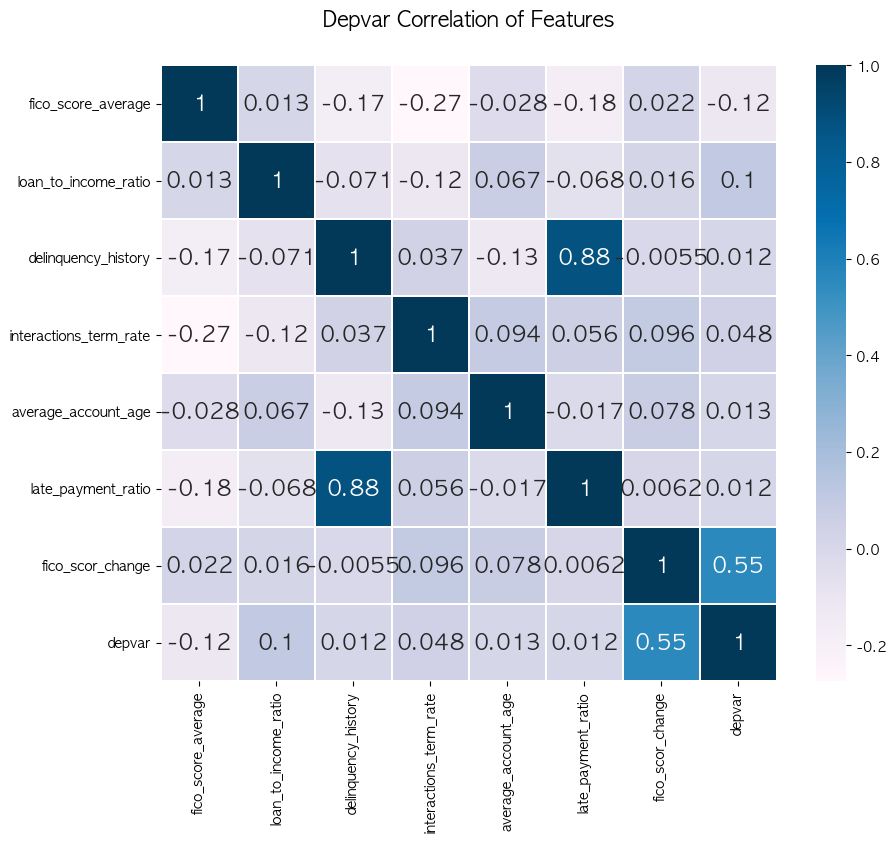

In [9]:
# 특성 조합 상관관계
heatmap_data = dftrain[['fico_score_average','loan_to_income_ratio','delinquency_history',"interactions_term_rate",
                        "average_account_age","late_payment_ratio",'fico_scor_change','depvar']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Depvar Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## Column들을 사전, 사후로 나누기

In [10]:
# 전체 Column 보기
for i in range(len(list(dftrain.columns))):
    print(list(dftrain.columns)[i])

index
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
acc_now_delinq
tot_coll_amt
tot_cur_bal
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens
emp_length1
emp_length2
emp_length3
emp_length4
emp_length5
emp_length6
emp_length7
emp_length8
emp_length9
emp_length10
emp_length11
emp_length12
home_ownership1
home_ownership2
home_ownership3
home_ownership4
home_ownership5
home_ownership6
verification_status1
verification_status2
verification_status3
purpose1
purpose2
purpose3
purpose4
purpose5
purpose6
purpose7
purpose8
purpose9
purpose10
purpose11
purpose12
purpose13
purpose14
addr_state1
addr_state2
addr_state3
addr_state4
a

In [11]:
# 변수명 확인하기
train_columns = set(dftrain.columns)
test_columns = set(dftest.columns)

columns_not_in_test = train_columns - test_columns
columns_not_in_train = test_columns - train_columns

print("Columns in train but not in test:", columns_not_in_test)
print("Columns in test but not in train:", columns_not_in_train)

Columns in train but not in test: set()
Columns in test but not in train: set()


In [12]:
# before(사전변수+애매변수+조합변수), after(사후변수) 정리 => 사전변수만사용
before = ['loan_amnt', 'int_rate', 'revol_bal', 'revol_util', 'annual_inc',
          'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
          'inq_last_6mths', 'open_acc', 'pub_rec', 'last_fico_range_high',
          'last_fico_range_low', 'acc_now_delinq', 'collections_12_mths_ex_med',
          'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths',
          'pub_rec_bankruptcies', 'tax_liens', 'total_acc', 'delinq_amnt',
          'emp_length1','emp_length2','emp_length3','emp_length4','emp_length5',
          'emp_length6','emp_length7','emp_length8','emp_length9','emp_length10',
          'emp_length11','emp_length12','home_ownership1','home_ownership2',
          'home_ownership3','home_ownership4','home_ownership5','home_ownership6',
          'verification_status1','verification_status2','verification_status3',
          'purpose1','purpose2','purpose3','purpose4','purpose5','purpose6','purpose7',
          'purpose8','purpose9','purpose10','purpose11','purpose12','purpose13',
          'purpose14','addr_state1','addr_state2','addr_state3','addr_state4',
          'addr_state5','addr_state6','addr_state7','addr_state8','addr_state9',
          'addr_state10','addr_state11','addr_state12','addr_state13','addr_state14',
          'addr_state15','addr_state16','addr_state17','addr_state18','addr_state19',
          'addr_state20','addr_state21','addr_state22','addr_state23','addr_state24',
          'addr_state25','addr_state26','addr_state27','addr_state28','addr_state29',
          'addr_state30','addr_state31','addr_state32','addr_state33','addr_state34',
          'addr_state35','addr_state36','addr_state37','addr_state38','addr_state39',
          'addr_state40','addr_state41','addr_state42','addr_state43','addr_state44',
          'addr_state45','addr_state46','addr_state47','addr_state48','addr_state49',
          'addr_state50','addr_state51','elapsed_t', 'debt_settlement_flag1','term1','mths_since_last_delinq1',
          'mths_since_last_delinq2','mths_since_last_delinq3','mths_since_last_delinq4',
          'mths_since_last_delinq5','mths_since_last_delinq6','mths_since_last_delinq7',
          'mths_since_last_delinq8','mths_since_last_delinq9','mths_since_last_delinq10',
          'mths_since_last_delinq11','mths_since_last_major_derog1','mths_since_last_major_derog2',
          'mths_since_last_major_derog3','mths_since_last_major_derog4','mths_since_last_major_derog5',
          'mths_since_last_major_derog6','mths_since_last_major_derog7','mths_since_last_major_derog8',
          'mths_since_last_major_derog9','mths_since_last_major_derog10','mths_since_last_major_derog11',
          'mths_since_last_record1','mths_since_last_record2','mths_since_last_record3','mths_since_last_record4',
          'mths_since_last_record5','mths_since_last_record6','mths_since_last_record7','mths_since_last_record8',
          'mths_since_last_record9','mths_since_last_record10','mths_since_last_record11','mths_since_rcnt_il1',
          'mths_since_rcnt_il2','mths_since_rcnt_il3','mths_since_rcnt_il4','mths_since_rcnt_il5','mths_since_rcnt_il6',
          'mths_since_rcnt_il7','mths_since_rcnt_il8','mths_since_rcnt_il9','mths_since_rcnt_il10','mths_since_rcnt_il11',
          'mths_since_recent_bc1','mths_since_recent_bc2','mths_since_recent_bc3','mths_since_recent_bc4',
          'mths_since_recent_bc5','mths_since_recent_bc6','mths_since_recent_bc7','mths_since_recent_bc8',
          'mths_since_recent_bc9','mths_since_recent_bc10','mths_since_recent_bc11','mths_since_recent_bc_dlq1',
          'mths_since_recent_bc_dlq2','mths_since_recent_bc_dlq3','mths_since_recent_bc_dlq4',
          'mths_since_recent_bc_dlq5','mths_since_recent_bc_dlq6','mths_since_recent_bc_dlq7',
          'mths_since_recent_bc_dlq8','mths_since_recent_bc_dlq9','mths_since_recent_bc_dlq10',
          'mths_since_recent_bc_dlq11','mths_since_recent_inq1','mths_since_recent_inq2','mths_since_recent_inq3',
          'mths_since_recent_inq4','mths_since_recent_inq5','mths_since_recent_inq6','mths_since_recent_inq7',
          'mths_since_recent_inq8','mths_since_recent_inq9','mths_since_recent_inq10','mths_since_recent_revol_delinq1',
          'mths_since_recent_revol_delinq2','mths_since_recent_revol_delinq3','mths_since_recent_revol_delinq4',
          'mths_since_recent_revol_delinq5','mths_since_recent_revol_delinq6','mths_since_recent_revol_delinq7',
          'mths_since_recent_revol_delinq8','mths_since_recent_revol_delinq9','mths_since_recent_revol_delinq10',
          'mths_since_recent_revol_delinq11','fico_score_average','loan_to_income_ratio','delinquency_history',
          'interactions_term_rate','average_account_age','late_payment_ratio','fico_scor_change']

after = ['funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','recoveries','collection_recovery_fee','last_pymnt_amnt',
         'collections_12_mths_ex_med','installment','total_rec_prncp','total_rec_int',
         'total_rec_late_fee','initial_list_status1','initial_list_status2',
        'issue_d1','issue_d2','issue_d3','issue_d4','issue_d5','issue_d6','issue_d7',
         'issue_d8','issue_d9','issue_d10','issue_d11','issue_d12','issue_d13',
         'issue_d14','issue_d15','issue_d16','issue_d17','issue_d18','issue_d19',
         'issue_d20','issue_d21','issue_d22','issue_d23','issue_d24','issue_d25',
         'issue_d26','issue_d27','issue_d28','issue_d29','issue_d30','issue_d31',
         'issue_d32','issue_d33','issue_d34','issue_d35','issue_d36','issue_d37',
         'issue_d38','issue_d39','issue_d40','issue_d41','issue_d42','issue_d43',
         'issue_d44','issue_d45','issue_d46','issue_d47','issue_d48','issue_d49',
         'issue_d50','issue_d51','issue_d52','issue_d53','issue_d54','issue_d55',
         'issue_d56','issue_d57','issue_d58','issue_d59','issue_d60','issue_d61',
         'issue_d62','issue_d63','issue_d64','issue_d65','issue_d66','issue_d67',
         'issue_d68','issue_d69','issue_d70','issue_d71','issue_d72','issue_d73',
         'issue_d74','issue_d75','issue_d76','issue_d77','issue_d78','issue_d79',
         'issue_d80','issue_d81','issue_d82','issue_d83','issue_d84','issue_d85',
         'issue_d86','issue_d87','issue_d88','issue_d89','issue_d90','issue_d91',
         'issue_d92','issue_d93','issue_d94','issue_d95','issue_d96','issue_d97',
         'issue_d98','issue_d99','issue_d100','issue_d101','issue_d102',
         'issue_d103','issue_d104','issue_d105','issue_d106','issue_d107',
         'issue_d108','issue_d109','issue_d110','issue_d111','issue_d112',
         'issue_d113','issue_d114','issue_d115','issue_d116','issue_d117',
         'issue_d118']

In [13]:
# column이 다 분류에 맞게 들어갔는지
for i in range(len(list(dftrain.columns))):
    if (list(dftrain.columns)[i]) not in before:
        if (list(dftrain.columns)[i]) not in after:
            print(list(dftrain.columns)[i])

index
depvar


In [14]:
# 사전변수들로만 df 재정리
before.append('depvar')
dftrain = dftrain[before]
dftest = dftest[before]

## 사전 변수들을 연속형 변수 / 범주형&이산형&더미 변수로 나누기

In [15]:
# train set - 연속형 변수 vs 범주형, 이산형, 더미 변수 구분 in 사전변수

tracategorical_vars = []
tracontinuous_vars = []
threshold=20

for col in dftrain.columns:
    # 해당 열의 유일한 값의 갯수 반환
    if dftrain[col].nunique() <= threshold:  # 유일한 값의 개수가 threshold 이하인 경우 범주형 변수로 간주
        tracategorical_vars.append(col)
    else:
        tracontinuous_vars.append(col)

tracategorical_vars

['inq_last_6mths',
 'acc_now_delinq',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'verification_status1',
 'verification_status2',
 'verification_status3',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'a

In [16]:
# test set - 연속형 변수 vs 범주형, 이산형, 더미 변수 구분 in 사전변수

tecategorical_vars = []
tecontinuous_vars = []
threshold=20

for col in dftest.columns:
    # 해당 열의 유일한 값의 갯수 반환
    if dftest[col].nunique() <= threshold:  # 유일한 값의 개수가 threshold 이하인 경우 범주형 변수로 간주
        tecategorical_vars.append(col)
    else:
        tecontinuous_vars.append(col)

tecategorical_vars

['inq_last_6mths',
 'acc_now_delinq',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'verification_status1',
 'verification_status2',
 'verification_status3',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'a

In [17]:
# categorical 변수명 서로 다른 게 있는지 확인하기
columns_not_in_test = set(tracategorical_vars) - set(tecategorical_vars)
columns_not_in_train = set(tecategorical_vars) - set(tracategorical_vars)

print("Columns in train but not in test:", columns_not_in_test)
print("Columns in test but not in train:", columns_not_in_train)

Columns in train but not in test: set()
Columns in test but not in train: set()


## 범주형 변수 처리 : 원핫인코딩

In [18]:
# 원핫 인코딩할 변수 리스트
getdummy = ['inq_last_6mths','acc_now_delinq','collections_12_mths_ex_med',
            'chargeoff_within_12_mths','pub_rec_bankruptcies']

In [19]:
# 범주형 변수 원핫인코딩 변환
dftrain = pd.get_dummies(dftrain, columns=getdummy)
dftest = pd.get_dummies(dftest, columns=getdummy)

## 이산형변수(더미변수) + 바꾼 범주형 변수 처리 : range 묶어서 자체 차원 축소

In [20]:
# train 전체 열 확인
for i in range(len(dftrain.columns)):
    print(dftrain.columns[i])

loan_amnt
int_rate
revol_bal
revol_util
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
open_acc
pub_rec
last_fico_range_high
last_fico_range_low
tot_coll_amt
tot_cur_bal
tax_liens
total_acc
delinq_amnt
emp_length1
emp_length2
emp_length3
emp_length4
emp_length5
emp_length6
emp_length7
emp_length8
emp_length9
emp_length10
emp_length11
emp_length12
home_ownership1
home_ownership2
home_ownership3
home_ownership4
home_ownership5
home_ownership6
verification_status1
verification_status2
verification_status3
purpose1
purpose2
purpose3
purpose4
purpose5
purpose6
purpose7
purpose8
purpose9
purpose10
purpose11
purpose12
purpose13
purpose14
addr_state1
addr_state2
addr_state3
addr_state4
addr_state5
addr_state6
addr_state7
addr_state8
addr_state9
addr_state10
addr_state11
addr_state12
addr_state13
addr_state14
addr_state15
addr_state16
addr_state17
addr_state18
addr_state19
addr_state20
addr_state21
addr_state22
addr_state23
addr_state24
addr_state25
addr_state26
addr_state27
addr_sta

In [21]:
# test 전체 열 확인
for i in range(len(dftest.columns)):
    print(dftest.columns[i])

loan_amnt
int_rate
revol_bal
revol_util
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
open_acc
pub_rec
last_fico_range_high
last_fico_range_low
tot_coll_amt
tot_cur_bal
tax_liens
total_acc
delinq_amnt
emp_length1
emp_length2
emp_length3
emp_length4
emp_length5
emp_length6
emp_length7
emp_length8
emp_length9
emp_length10
emp_length11
emp_length12
home_ownership1
home_ownership2
home_ownership3
home_ownership4
home_ownership5
home_ownership6
verification_status1
verification_status2
verification_status3
purpose1
purpose2
purpose3
purpose4
purpose5
purpose6
purpose7
purpose8
purpose9
purpose10
purpose11
purpose12
purpose13
purpose14
addr_state1
addr_state2
addr_state3
addr_state4
addr_state5
addr_state6
addr_state7
addr_state8
addr_state9
addr_state10
addr_state11
addr_state12
addr_state13
addr_state14
addr_state15
addr_state16
addr_state17
addr_state18
addr_state19
addr_state20
addr_state21
addr_state22
addr_state23
addr_state24
addr_state25
addr_state26
addr_state27
addr_sta

In [22]:
# categorical 변수명 확인하기
columns_not_in_test = set(dftrain.columns) - set(dftest.columns)
columns_not_in_train = set(dftest.columns) - set(dftrain.columns)

print("Columns in train but not in test:", columns_not_in_test)
print()
print("Columns in test but not in train:", columns_not_in_train)

Columns in train but not in test: {'collections_12_mths_ex_med_9', 'collections_12_mths_ex_med_20', 'acc_now_delinq_14', 'pub_rec_bankruptcies_11', 'inq_last_6mths_8', 'inq_last_6mths_7', 'chargeoff_within_12_mths_10', 'pub_rec_bankruptcies_12', 'collections_12_mths_ex_med_14', 'collections_12_mths_ex_med_8', 'acc_now_delinq_6', 'collections_12_mths_ex_med_11', 'collections_12_mths_ex_med_16', 'chargeoff_within_12_mths_7'}

Columns in test but not in train: {'collections_12_mths_ex_med_12', 'pub_rec_bankruptcies_9'}


##### 위에서 사후 변수 뺀 사용 변수들의 더미변수 모음
- emp_length1~12
- home_ownership1~6
- verification_status1~3
- purpose1~14
- addr_state1~51
- mths_since_last_delinq1~11
- mths_since_last_major_derog1~11
- mths_since_last_record1~11
- mths_since_rcnt_il1~11
- mths_since_recent_bc1~11
- mths_since_recent_bc_dlq1~11
- mths_since_recent_inq1~10
- mths_since_recent_revol_delinq1~11

--- 여기까진 똑같고 아래부터 다름 train / test
- inq_last_6mths_0\~8 / 0\~6
- acc_now_delinq_0\~6,14 / 0\~5
- collections_12_mths_ex_med_0\~11,14,16,20 / 0\~7,10,12
- chargeoff_within_12_mths_0\~7,9,10 / 0\~6,9
- pub_rec_bankruptcies_0\~8,11,12 / 0\~9

In [23]:
def process_dummy(df):
    # emp_length
    df['no_emp'] = df['emp_length12']
    df['emp_length_over10'] = df['emp_length2']
    df['emp_length_upto_9'] = df[['emp_length1','emp_length3', 'emp_length4','emp_length5', 'emp_length6','emp_length7', 'emp_length8','emp_length9','emp_length10']].max(axis=1)
    df = df.drop([f'emp_length{i+1}' for i in range(12)], axis=1)
    # home_ownership
    df['home_ownership'] = df['home_ownership5']
    df['home_ownership_others'] = df[['home_ownership1','home_ownership3', 'home_ownership4']].max(axis=1)
    df['home_ownership_transfer'] = df[['home_ownership2', 'home_ownership6']].max(axis=1)
    df = df.drop([f'home_ownership{i+1}' for i in range(6)], axis=1)

    # verification_status
    df['verification_identified'] = df[['verification_status2', 'verification_status3']].max(axis=1)
    df['verification_non_identified'] = df['verification_status1']
    df = df.drop(['verification_status1', 'verification_status2', 'verification_status3'], axis=1)

    # purpose
    df['purpose_home'] = df[['purpose5', 'purpose6']].max(axis=1)
    df['purpose_credit'] = df[['purpose2', 'purpose3']].max(axis=1)
    df['purpose_purchase'] = df[['purpose1', 'purpose4', 'purpose7', 'purpose8', 'purpose9', 'purpose13', 'purpose14']].max(axis=1)
    df['purpose_other'] = df['purpose10']
    df['purpose_business'] = df[['purpose11', 'purpose12']].max(axis=1)
    df = df.drop([f'purpose{i+1}' for i in range(14)], axis=1)

    # addr_state
    df['addr_state_high_inc'] = df[['addr_state7', 'addr_state8', 'addr_state20']].max(axis=1)
    df['addr_state_med1_inc'] = df[['addr_state1', 'addr_state5', 'addr_state6', 'addr_state15', 'addr_state21', 'addr_state31', 'addr_state32', 'addr_state35', 'addr_state46', 'addr_state48', 'addr_state51']].max(axis=1)
    df['addr_state_med2_inc'] = df[['addr_state4', 'addr_state9', 'addr_state10', 'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14', 'addr_state16', 'addr_state17', 'addr_state19', 'addr_state22', 'addr_state23', 'addr_state24', 'addr_state25', 'addr_state27', 'addr_state28', 'addr_state29', 'addr_state30', 'addr_state34', 'addr_state36', 'addr_state37','addr_state38','addr_state39', 'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44', 'addr_state45', 'addr_state47', 'addr_state49']].max(axis=1)
    df['addr_state_low_inc'] = df[['addr_state2', 'addr_state3', 'addr_state18', 'addr_state26', 'addr_state33', 'addr_state50']].max(axis=1)
    df = df.drop([f'addr_state{i+1}' for i in range(51)], axis=1)

    # mths_since_last_delinq
    df['no_mths_since_last_delinq '] = df[['mths_since_last_delinq1']]
    df['short_mths_since_last_delinq '] = df[[ 'mths_since_last_delinq2', 'mths_since_last_delinq3', 'mths_since_last_delinq4','mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7']].max(axis=1)
    df['long_mths_since_last_delinq '] = df[[ 'mths_since_last_delinq8', 'mths_since_last_delinq9', 'mths_since_last_delinq10', 'mths_since_last_delinq11']].max(axis=1)
    df = df.drop([f'mths_since_last_delinq{i+1}' for i in range(11)], axis=1) 

    # mths_since_last_major_derog
    df['no_mths_since_last_major_derog '] = df[['mths_since_last_major_derog1']]
    df['short_mths_since_last_major_derog '] = df[[ 'mths_since_last_major_derog2', 'mths_since_last_major_derog3', 'mths_since_last_major_derog4','mths_since_last_major_derog5', 'mths_since_last_major_derog6', 'mths_since_last_major_derog7']].max(axis=1)
    df['long_mths_since_last_major_derog '] = df[[ 'mths_since_last_major_derog8', 'mths_since_last_major_derog9', 'mths_since_last_major_derog10', 'mths_since_last_major_derog11']].max(axis=1)
    df = df.drop([f'mths_since_last_major_derog{i+1}' for i in range(11)], axis=1)

    # mths_since_last_record
    df['no_mths_since_last_record '] = df[['mths_since_last_record1']]
    df['short_mths_since_last_record '] = df[[ 'mths_since_last_record2', 'mths_since_last_record3', 'mths_since_last_record4','mths_since_last_record5', 'mths_since_last_record6', 'mths_since_last_record7']].max(axis=1)
    df['long_mths_since_last_record '] = df[[ 'mths_since_last_record8', 'mths_since_last_record9', 'mths_since_last_record10', 'mths_since_last_record11']].max(axis=1)
    df = df.drop([f'mths_since_last_record{i+1}' for i in range(11)], axis=1)

    # mths_since_rcnt_il
    df['no_mths_since_rcnt_il '] = df[['mths_since_rcnt_il1']]
    df['short_mths_since_rcnt_il '] = df[[ 'mths_since_rcnt_il2', 'mths_since_rcnt_il3', 'mths_since_rcnt_il4','mths_since_rcnt_il5', 'mths_since_rcnt_il6', 'mths_since_rcnt_il7']].max(axis=1)
    df['long_mths_since_rcnt_il '] = df[[ 'mths_since_rcnt_il8', 'mths_since_rcnt_il9', 'mths_since_rcnt_il10', 'mths_since_rcnt_il11']].max(axis=1)
    df = df.drop([f'mths_since_rcnt_il{i+1}' for i in range(11)], axis=1)

    # mths_since_recent_bc
    df['no_mths_since_recent_bc '] = df[['mths_since_recent_bc1']]
    df['short_mths_since_recent_bc '] = df[[ 'mths_since_recent_bc2', 'mths_since_recent_bc3', 'mths_since_recent_bc4','mths_since_recent_bc5', 'mths_since_recent_bc6', 'mths_since_recent_bc7']].max(axis=1)
    df['long_mths_since_recent_bc '] = df[[ 'mths_since_recent_bc8', 'mths_since_recent_bc9', 'mths_since_recent_bc10', 'mths_since_recent_bc11']].max(axis=1)
    df = df.drop([f'mths_since_recent_bc{i+1}' for i in range(11)], axis=1)

    # mths_since_recent_bc_dlq
    df['no_mths_since_recent_bc_dlq '] = df[['mths_since_recent_bc_dlq1']]
    df['short_mths_since_recent_bc_dlq '] = df[[ 'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3', 'mths_since_recent_bc_dlq4','mths_since_recent_bc_dlq5', 'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7']].max(axis=1)
    df['long_mths_since_recent_bc_dlq '] = df[[ 'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9', 'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11']].max(axis=1)
    df = df.drop([f'mths_since_recent_bc_dlq{i+1}' for i in range(11)], axis=1)

    # mths_since_recent_inq
    df['no_mths_since_recent_inq '] = df[['mths_since_recent_inq1']]
    df['short_mths_since_recent_inq '] = df[[ 'mths_since_recent_inq2', 'mths_since_recent_inq3', 'mths_since_recent_inq4','mths_since_recent_inq5', 'mths_since_recent_inq6']].max(axis=1)
    df['long_mths_since_recent_inq '] = df[[ 'mths_since_recent_inq7','mths_since_recent_inq8', 'mths_since_recent_inq9', 'mths_since_recent_inq10']].max(axis=1)
    df = df.drop([f'mths_since_recent_inq{i+1}' for i in range(10)], axis=1)

    # mths_since_recent_revol_delinq
    df['no_mths_since_recent_revol_delinq '] = df[['mths_since_recent_revol_delinq1']]
    df['short_mths_since_recent_revol_delinq '] = df[[ 'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4','mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7']].max(axis=1)
    df['long_mths_since_recent_revol_delinq '] = df[[ 'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9', 'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11']].max(axis=1)
    df = df.drop([f'mths_since_recent_revol_delinq{i+1}' for i in range(11)], axis=1)
    
    return(df)
dftrain = process_dummy(dftrain)
dftest = process_dummy(dftest)

In [24]:
### train 원핫인코딩 더미
# inq_last_6mths 
dftrain['no_inq_last_6mths'] = dftrain[['inq_last_6mths_0']]
dftrain['short_inq_last_6mths'] = dftrain[['inq_last_6mths_1', 'inq_last_6mths_2', 'inq_last_6mths_3', 'inq_last_6mths_4', 'inq_last_6mths_5', 'inq_last_6mths_6']].max(axis=1)
dftrain['long_inq_last_6mths'] = dftrain[[ 'inq_last_6mths_7', 'inq_last_6mths_8']].max(axis=1)
dftrain = dftrain.drop([f'inq_last_6mths_{i+1}' for i in range(8)], axis=1)

# acc_now_delinq 
dftrain['no_acc_now_delinq'] = dftrain[['acc_now_delinq_0']]
dftrain['short_acc_now_delinq'] = dftrain[['acc_now_delinq_1', 'acc_now_delinq_2', 'acc_now_delinq_3', 'acc_now_delinq_4', 'acc_now_delinq_5', 'acc_now_delinq_6']].max(axis=1)
dftrain['long_acc_now_delinq'] = dftrain[[ 'acc_now_delinq_14']].max(axis=1)
dftrain = dftrain.drop([f'acc_now_delinq_{i+1}' for i in range(6)], axis=1)
dftrain = dftrain.drop(['acc_now_delinq_14'], axis=1)

# 'collections_12_mths_ex_med’ 
dftrain['collections_12_mths_ex_med_12'] = 0

dftrain['no_collections_12_mths_ex_med'] = dftrain[['collections_12_mths_ex_med_0']]
dftrain['short_collections_12_mths_ex_med'] = dftrain[['collections_12_mths_ex_med_1', 'collections_12_mths_ex_med_2', 'collections_12_mths_ex_med_3', 'collections_12_mths_ex_med_4', 'collections_12_mths_ex_med_5', 'collections_12_mths_ex_med_6']].max(axis=1)
dftrain['long_collections_12_mths_ex_med'] = dftrain[['collections_12_mths_ex_med_7',  'collections_12_mths_ex_med_8', 'collections_12_mths_ex_med_9', 'collections_12_mths_ex_med_10', 'collections_12_mths_ex_med_11', 'collections_12_mths_ex_med_12', 'collections_12_mths_ex_med_14', 'collections_12_mths_ex_med_16', 
                                            'collections_12_mths_ex_med_20']].max(axis=1)
dftrain = dftrain.drop([f'collections_12_mths_ex_med_{i+1}' for i in range(11)], axis=1)
dftrain = dftrain.drop(['collections_12_mths_ex_med_14'], axis=1)
dftrain = dftrain.drop(['collections_12_mths_ex_med_16'], axis=1)
dftrain = dftrain.drop(['collections_12_mths_ex_med_20'], axis=1)


# chargeoff_within_12_mths 
dftrain['no_chargeoff_within_12_mths'] = dftrain[['chargeoff_within_12_mths_0']]
dftrain['chargeoff_within_12_mths_upto3'] = dftrain[['chargeoff_within_12_mths_1', 'chargeoff_within_12_mths_2', 'chargeoff_within_12_mths_3']].max(axis=1)
dftrain['chargeoff_within_12_mths_moret3'] = dftrain[['chargeoff_within_12_mths_4', 'chargeoff_within_12_mths_5', 'chargeoff_within_12_mths_6', 'chargeoff_within_12_mths_7', 'chargeoff_within_12_mths_9', 'chargeoff_within_12_mths_10']].max(axis=1)
dftrain = dftrain.drop([f'chargeoff_within_12_mths_{i+1}' for i in range(7)], axis=1)
dftrain = dftrain.drop(['chargeoff_within_12_mths_9'], axis=1)
dftrain = dftrain.drop(['chargeoff_within_12_mths_10'], axis=1)

# pub_rec_bankruptcies 
dftrain['pub_rec_bankruptcies_9'] = 0

dftrain['no_pub_rec_bankruptcies'] = dftrain[['pub_rec_bankruptcies_0']]
dftrain['pub_rec_bankruptcies_upto3'] = dftrain[['pub_rec_bankruptcies_1', 'pub_rec_bankruptcies_2', 'pub_rec_bankruptcies_3']].max(axis=1)
dftrain['pub_rec_bankruptcies_moret3'] = dftrain[['pub_rec_bankruptcies_4', 'pub_rec_bankruptcies_5', 'pub_rec_bankruptcies_6', 'pub_rec_bankruptcies_7', 'pub_rec_bankruptcies_8','pub_rec_bankruptcies_9', 'pub_rec_bankruptcies_11', 'pub_rec_bankruptcies_12']].max(axis=1)
dftrain = dftrain.drop([f'pub_rec_bankruptcies_{i+1}' for i in range(9)], axis=1)
dftrain = dftrain.drop(['pub_rec_bankruptcies_11'], axis=1)
dftrain = dftrain.drop(['pub_rec_bankruptcies_12'], axis=1)

# 마지막 drop
dftrain = dftrain.drop(['inq_last_6mths_0','acc_now_delinq_0','collections_12_mths_ex_med_0',
                        'chargeoff_within_12_mths_0','pub_rec_bankruptcies_0'], axis=1)

In [25]:
# train 전체 열 확인
for i in range(len(dftrain.columns)):
    print(dftrain.columns[i])

loan_amnt
int_rate
revol_bal
revol_util
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
open_acc
pub_rec
last_fico_range_high
last_fico_range_low
tot_coll_amt
tot_cur_bal
tax_liens
total_acc
delinq_amnt
elapsed_t
debt_settlement_flag1
term1
fico_score_average
loan_to_income_ratio
delinquency_history
interactions_term_rate
average_account_age
late_payment_ratio
fico_scor_change
depvar
no_emp
emp_length_over10
emp_length_upto_9
home_ownership
home_ownership_others
home_ownership_transfer
verification_identified
verification_non_identified
purpose_home
purpose_credit
purpose_purchase
purpose_other
purpose_business
addr_state_high_inc
addr_state_med1_inc
addr_state_med2_inc
addr_state_low_inc
no_mths_since_last_delinq 
short_mths_since_last_delinq 
long_mths_since_last_delinq 
no_mths_since_last_major_derog 
short_mths_since_last_major_derog 
long_mths_since_last_major_derog 
no_mths_since_last_record 
short_mths_since_last_record 
long_mths_since_last_record 
no_mths_since_rcnt_

In [26]:
### test 원핫인코딩 더미
# inq_last_6mths 
dftest['inq_last_6mths_7'] = 0
dftest['inq_last_6mths_8'] = 0

dftest['no_inq_last_6mths'] = dftest['inq_last_6mths_0']
dftest['short_inq_last_6mths'] = dftest[['inq_last_6mths_1', 'inq_last_6mths_2', 'inq_last_6mths_3', 'inq_last_6mths_4', 'inq_last_6mths_5', 'inq_last_6mths_6']].max(axis=1)
dftest['long_inq_last_6mths'] = dftest[['inq_last_6mths_7', 'inq_last_6mths_8']].max(axis=1)
dftest = dftest.drop([f'inq_last_6mths_{i+1}' for i in range(8)], axis=1)

# acc_now_delinq 
dftest['acc_now_delinq_6'] = 0
dftest['acc_now_delinq_14'] = 0

dftest['no_acc_now_delinq'] = dftest[['acc_now_delinq_0']]
dftest['short_acc_now_delinq'] = dftest[['acc_now_delinq_1', 'acc_now_delinq_2', 'acc_now_delinq_3', 'acc_now_delinq_4', 'acc_now_delinq_5', 'acc_now_delinq_6']].max(axis=1)
dftest['long_acc_now_delinq'] = dftest[[ 'acc_now_delinq_14']].max(axis=1)
dftest = dftest.drop([f'acc_now_delinq_{i+1}' for i in range(6)], axis=1)
dftest = dftest.drop(['acc_now_delinq_14'], axis=1)

# 'collections_12_mths_ex_med’ 
dftest['collections_12_mths_ex_med_8'] = 0
dftest['collections_12_mths_ex_med_9'] = 0
dftest['collections_12_mths_ex_med_11'] = 0
dftest['collections_12_mths_ex_med_14'] = 0
dftest['collections_12_mths_ex_med_16'] = 0
dftest['collections_12_mths_ex_med_20'] = 0

dftest['no_collections_12_mths_ex_med'] = dftest[['collections_12_mths_ex_med_0']]
dftest['short_collections_12_mths_ex_med'] = dftest[['collections_12_mths_ex_med_1', 'collections_12_mths_ex_med_2', 'collections_12_mths_ex_med_3', 'collections_12_mths_ex_med_4', 'collections_12_mths_ex_med_5', 'collections_12_mths_ex_med_6']].max(axis=1)
dftest['long_collections_12_mths_ex_med'] = dftest[['collections_12_mths_ex_med_7',  'collections_12_mths_ex_med_8', 'collections_12_mths_ex_med_9', 'collections_12_mths_ex_med_10', 'collections_12_mths_ex_med_11', 'collections_12_mths_ex_med_12', 'collections_12_mths_ex_med_14', 'collections_12_mths_ex_med_16', 
                                            'collections_12_mths_ex_med_20']].max(axis=1)
dftest = dftest.drop([f'collections_12_mths_ex_med_{i+1}' for i in range(11)], axis=1)
dftest = dftest.drop(['collections_12_mths_ex_med_14'], axis=1)
dftest = dftest.drop(['collections_12_mths_ex_med_16'], axis=1)
dftest = dftest.drop(['collections_12_mths_ex_med_20'], axis=1)

# chargeoff_within_12_mths 
dftest['chargeoff_within_12_mths_7'] = 0
dftest['chargeoff_within_12_mths_10'] = 0

dftest['no_chargeoff_within_12_mths'] = dftest[['chargeoff_within_12_mths_0']]
dftest['chargeoff_within_12_mths_upto3'] = dftest[['chargeoff_within_12_mths_1', 'chargeoff_within_12_mths_2', 'chargeoff_within_12_mths_3']].max(axis=1)
dftest['chargeoff_within_12_mths_moret3'] = dftest[['chargeoff_within_12_mths_4', 'chargeoff_within_12_mths_5', 'chargeoff_within_12_mths_6', 'chargeoff_within_12_mths_7', 'chargeoff_within_12_mths_9', 'chargeoff_within_12_mths_10']].max(axis=1)
dftest = dftest.drop([f'chargeoff_within_12_mths_{i+1}' for i in range(7)], axis=1)
dftest = dftest.drop(['chargeoff_within_12_mths_9'], axis=1)
dftest = dftest.drop(['chargeoff_within_12_mths_10'], axis=1)

# pub_rec_bankruptcies 
dftest['pub_rec_bankruptcies_11'] = 0
dftest['pub_rec_bankruptcies_12'] = 0

dftest['no_pub_rec_bankruptcies'] = dftest[['pub_rec_bankruptcies_0']]
dftest['pub_rec_bankruptcies_upto3'] = dftest[['pub_rec_bankruptcies_1', 'pub_rec_bankruptcies_2', 'pub_rec_bankruptcies_3']].max(axis=1)
dftest['pub_rec_bankruptcies_moret3'] = dftest[['pub_rec_bankruptcies_4', 'pub_rec_bankruptcies_5', 'pub_rec_bankruptcies_6', 'pub_rec_bankruptcies_7', 'pub_rec_bankruptcies_8','pub_rec_bankruptcies_9', 'pub_rec_bankruptcies_11', 'pub_rec_bankruptcies_12']].max(axis=1)
dftest = dftest.drop([f'pub_rec_bankruptcies_{i+1}' for i in range(9)], axis=1)
dftest = dftest.drop(['pub_rec_bankruptcies_11'], axis=1)
dftest = dftest.drop(['pub_rec_bankruptcies_12'], axis=1)

# 마지막 drop
dftest = dftest.drop(['inq_last_6mths_0','acc_now_delinq_0','collections_12_mths_ex_med_0',
                        'chargeoff_within_12_mths_0','pub_rec_bankruptcies_0'], axis=1)

In [27]:
# test 전체 열 확인
for i in range(len(dftest.columns)):
    print(dftest.columns[i])

loan_amnt
int_rate
revol_bal
revol_util
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
open_acc
pub_rec
last_fico_range_high
last_fico_range_low
tot_coll_amt
tot_cur_bal
tax_liens
total_acc
delinq_amnt
elapsed_t
debt_settlement_flag1
term1
fico_score_average
loan_to_income_ratio
delinquency_history
interactions_term_rate
average_account_age
late_payment_ratio
fico_scor_change
depvar
collections_12_mths_ex_med_12
no_emp
emp_length_over10
emp_length_upto_9
home_ownership
home_ownership_others
home_ownership_transfer
verification_identified
verification_non_identified
purpose_home
purpose_credit
purpose_purchase
purpose_other
purpose_business
addr_state_high_inc
addr_state_med1_inc
addr_state_med2_inc
addr_state_low_inc
no_mths_since_last_delinq 
short_mths_since_last_delinq 
long_mths_since_last_delinq 
no_mths_since_last_major_derog 
short_mths_since_last_major_derog 
long_mths_since_last_major_derog 
no_mths_since_last_record 
short_mths_since_last_record 
long_mths_since_la

In [28]:
# train vs test 변수명 서로 없는 거 확인하기
columns_not_in_test = set(dftrain.columns) - set(dftest.columns)
columns_not_in_train = set(dftest.columns) - set(dftrain.columns)

print("Columns in train but not in test:", columns_not_in_test)
print()
print("Columns in test but not in train:", columns_not_in_train)

Columns in train but not in test: set()

Columns in test but not in train: set()


## 사용하기 편하게 csv 파일로

In [ ]:
# 사용하기 편하게 csv 파일로
dftrain.to_csv('preprocessing_train.csv', index=False)
dftest.to_csv('preprocessing_test.csv', index=False)

In [4]:
import pandas as pd
# train 잘 나왔나 확인
dftrain = pd.read_csv('preprocessing_train.csv')
dftrain

loan_amnt  int_rate  revol_bal  revol_util  annual_inc    dti  \
0           12000    0.0789       5673       0.405     90641.0  10.20   
1           14000    0.1147      10285       0.664     46000.0  17.40   
2           24000    0.1147      18989       0.474     90000.0  11.73   
3           14000    0.0949      16451       0.401    115000.0   7.31   
4           14000    0.0999      25930       0.534     78000.0  24.32   
...           ...       ...        ...         ...         ...    ...   
874330      32000    0.1875      91190       0.813     90000.0  27.39   
874331      24000    0.0692      38338       0.844     76000.0  34.20   
874332       4000    0.0662       3397       0.092     24960.0  25.29   
874333       8000    0.1288       3304       0.370     53000.0  18.07   
874334       8000    0.1149       9603       0.549     77000.0  18.02   

        delinq_2yrs  fico_range_low  fico_range_high  open_acc  ...  \
0                 0             690              694         5  ...   
1                 1             670              674         9  ...   
2                 2             660              664         6  ...   
3                 0             660              664        16  ...   
4                 0             685              689        17  ...   
...             ...             ...              ...       ...  ...   
874330            0             735              739        14  ...   
874331            0             685              689        16  ...   
874332            0             790              794        15  ...   
874333            2             680              684        10  ...   
874334            1             675              679         8  ...   

        collections_12_mths_ex_med_12  no_collections_12_mths_ex_med  \
0                                   0                              1   
1                                   0                              1   
2                                   0                              1   
3                                   0                              1   
4                                   0                              1   
...                               ...                            ...   
874330                              0                              1   
874331                              0                              1   
874332                              0                              1   
874333                              0                              1   
874334                              0                              1   

        short_collections_12_mths_ex_med  long_collections_12_mths_ex_med  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
874330                                 0                                0   
874331                                 0                                0   
874332                                 0                                0   
874333                                 0                                0   
874334                                 0                                0   

        no_chargeoff_within_12_mths  chargeoff_within_12_mths_upto3  \
0                                 1                               0   
1                                 1                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
...                             ...                           

In [5]:
# test 잘 나왔나 확인
dftest = pd.read_csv('preprocessing_test.csv')
dftest

loan_amnt  int_rate  revol_bal  revol_util  annual_inc    dti  \
0            7500    0.0890      10869       0.715     65000.0  22.47   
1           26250    0.1999      32793       0.593     73216.0  33.11   
2           35000    0.1147      55052       0.590    160000.0  21.31   
3            6000    0.1064       5918       0.489     40000.0  16.53   
4           14000    0.1580      37349       0.523    105000.0   7.56   
...           ...       ...        ...         ...         ...    ...   
218579      10000    0.0624      68226       0.720     95000.0  12.65   
218580       6000    0.2031       5416       0.430     50000.0  13.42   
218581      20000    0.1274      12447       0.530     70000.0  12.64   
218582      17000    0.1199       8693       0.608     72000.0  16.87   
218583      16000    0.0839      73595       0.803    105000.0  16.90   

        delinq_2yrs  fico_range_low  fico_range_high  open_acc  ...  \
0                 1             690              694        10  ...   
1                 0             710              714        12  ...   
2                 0             685              689        18  ...   
3                 0             685              689         8  ...   
4                 0             675              679        11  ...   
...             ...             ...              ...       ...  ...   
218579            0             695              699        12  ...   
218580            0             680              684        10  ...   
218581            0             700              704        10  ...   
218582            2             665              669         7  ...   
218583            0             695              699        23  ...   

        long_acc_now_delinq  no_collections_12_mths_ex_med  \
0                         0                              1   
1                         0                              1   
2                         0                              1   
3                         0                              1   
4                         0                              1   
...                     ...                            ...   
218579                    0                              1   
218580                    0                              1   
218581                    0                              1   
218582                    0                              1   
218583                    0                              1   

        short_collections_12_mths_ex_med  long_collections_12_mths_ex_med  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
218579                                 0                                0   
218580                                 0                                0   
218581                                 0                                0   
218582                                 0                                0   
218583                                 0                                0   

        no_chargeoff_within_12_mths  chargeoff_within_12_mths_upto3  \
0                                 1                               0   
1                                 1                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
...                             ...                             ...   
218579                            1                               0   
218580                            1     

# 3. LDA & SMOTE 적용한 LDA

In [6]:
# train과 test의 열 순서가 다를 경우에 생기는 오류 해결
dftest = dftest[dftrain.columns]

In [7]:
from sklearn.model_selection import train_test_split
# 데이터 준비
X_train = dftrain.drop('depvar', axis=1)  # 독립 변수 (feature)
y_train = dftrain['depvar']  # 종속 변수 (target)
X_test = dftest.drop('depvar', axis=1)  # 독립 변수 (feature)
y_test = dftest['depvar']  # 종속 변수 (target)

In [8]:
from imblearn.over_sampling import SMOTE
# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA를 이용한 차원축소

ldaorigin = LinearDiscriminantAnalysis(n_components=1)
train_lda = ldaorigin.fit_transform(X_train, y_train)
test_lda = ldaorigin.transform(X_test)

ldasmote = LinearDiscriminantAnalysis(n_components=1)
train_smote_lda = ldasmote.fit_transform(X_train_smote, y_train_smote)
test_smote_lda = ldasmote.transform(X_test)

# 4. 목적함수 만들기

In [10]:
#custom1 만들기
def custom1_score(y_train, predictions):
    i = -1 ; loss = 0
    for true_label, pred_label in zip(y_train, predictions):
        i += 1
        loan_amnt = X_train['loan_amnt'].iloc[i]
        int_rate = X_train['int_rate'].iloc[i]
        if (true_label == 0) & (pred_label == 1):
            loss += loan_amnt * int_rate
        elif (true_label == 1) & (pred_label == 0):
            loss += loan_amnt
    return loss

# 5. 모델 돌리기

### Logistic Regression

##### SMOTE X

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': LogisticRegression(),
    'params' : {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1','l2','none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_lda, y_train)

print(f"Best parameters for Logistic Regression: {clf.best_params_}")
print(f"Best score for Logistic Regression: {clf.best_score_}")

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best score for Logistic Regression: -169192839.38550004


In [ ]:
# 최적의 파라미터로 학습된 모델로 test 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - Logistic Regression Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

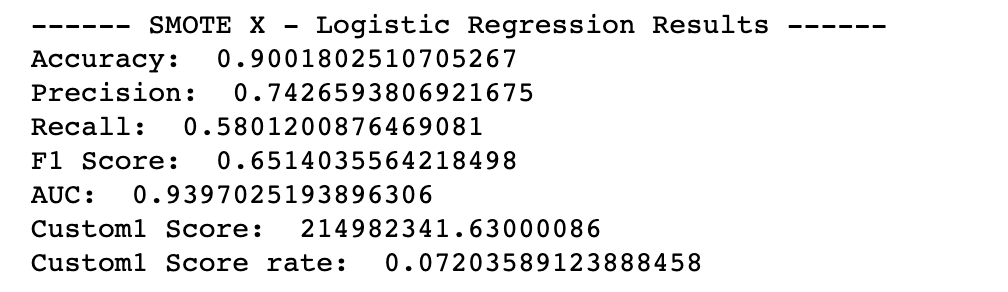

##### SMOTE O

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': LogisticRegression(),
    'params' : {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1','l2','none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_smote_lda, y_train_smote)

print(f"Best parameters for Logistic Regression: {clf.best_params_}")
print(f"Best score for Logistic Regression: {clf.best_score_}")

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: -282362842.891


In [ ]:
# 최적의 파라미터로 학습된 모델로 test 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE O - Logistic Regression Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

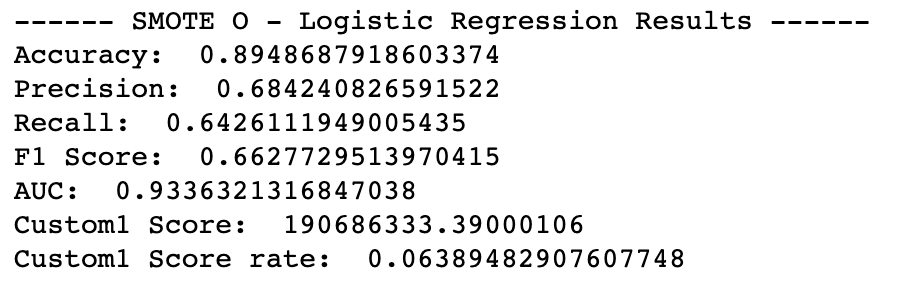

### XGBoost

##### SMOTE X

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'params' : {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)


# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_lda, y_train)
print(f"Best parameters for XGBoost: {clf.best_params_}")
print(f"Best score for XGBoost: {clf.best_score_}")

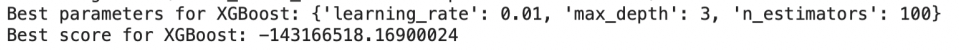

In [ ]:
# 최적의 파라미터로 학습된 모델로 test 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - XGBoost Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

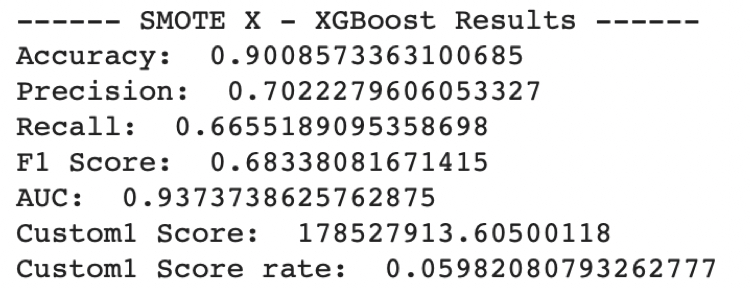

##### SMOTE O

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'params' : {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)


# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_smote_lda, y_train_smote)
print(f"Best parameters for XGBoost: {clf.best_params_}")
print(f"Best score for XGBoost: {clf.best_score_}")

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best score for XGBoost: -310378924.21099997


------ SMOTE O - XGBoost Results ------
Accuracy:  0.8942740548256048
Precision:  0.666114378814238
Recall:  0.6864346489855155
F1 Score:  0.6761218712335679
AUC:  0.9336169560908464
Custom1 Score:  172544220.54500076
Custom1 Score rate:  0.05781580296706223


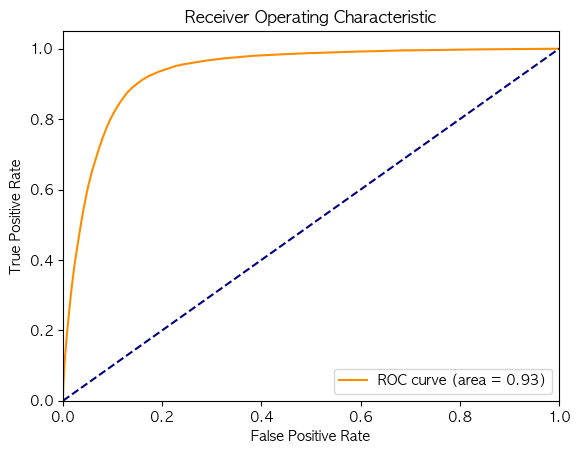

In [12]:
# 최적의 파라미터로 학습된 모델로 test 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE O - XGBoost Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### LightGBM

##### SMOTE X

In [ ]:
from lightgbm import LGBMClassifier

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': LGBMClassifier(),
    'params' : {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_lda, y_train)
print(f"Best parameters for LightGBM: {clf.best_params_}")
print(f"Best score for LightGBM: {clf.best_score_}")

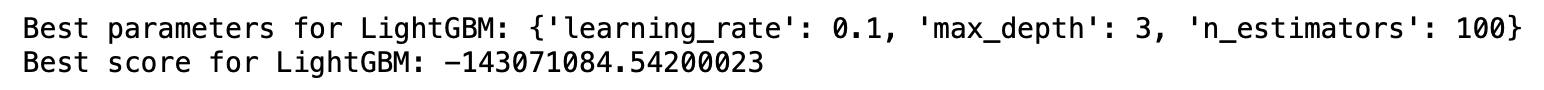

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - LightGBM Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

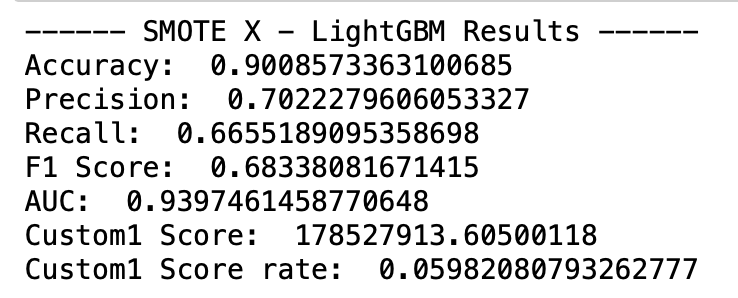

##### SMOTE O

In [ ]:
from lightgbm import LGBMClassifier

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': LGBMClassifier(),
    'params' : {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_smote_lda, y_train_smote)
print(f"Best parameters for LightGBM: {clf.best_params_}")
print(f"Best score for LightGBM: {clf.best_score_}")

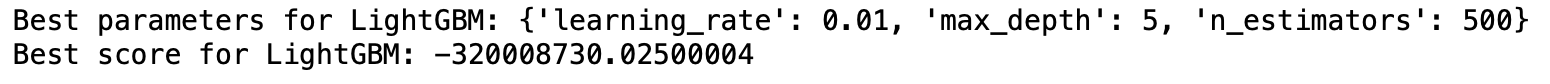

In [ ]:
# 최적의 파라미터로 학습된 모델로 test 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE O - LightGBM Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

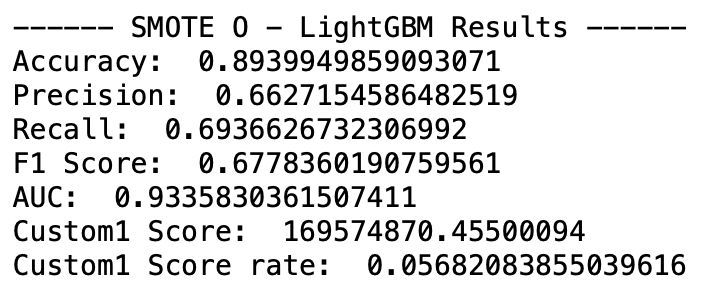

### Naive Bayes Classifier

##### SMOTE X

In [ ]:
from sklearn.naive_bayes import GaussianNB


### 나이브 베이즈 모델은 하이퍼파라미터가 많지 않고 모델이 비교적 간단하기 때문에
### 일반적으로 그리드 서치(GridSearchCV)를 적용할 필요 X
# Gaussian Naive Bayes 모델 생성
clf = GaussianNB()

# 모델 학습
clf.fit(train_lda, y_train)

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - Gaussian Naive Bayes Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

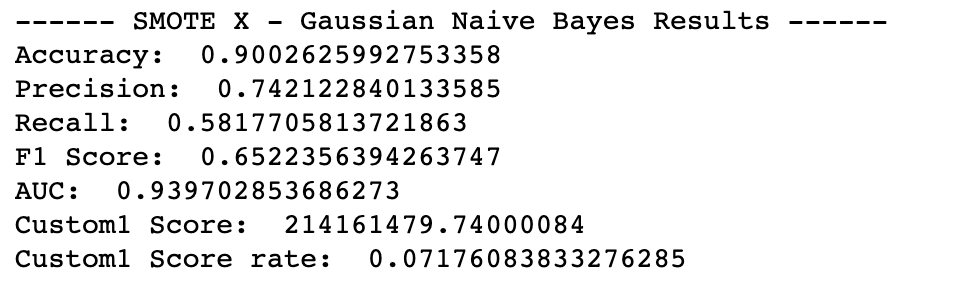

##### SMOTE O

In [ ]:
from sklearn.naive_bayes import GaussianNB


### 나이브 베이즈 모델은 하이퍼파라미터가 많지 않고 모델이 비교적 간단하기 때문에
### 일반적으로 그리드 서치(GridSearchCV)를 적용할 필요 X
# Gaussian Naive Bayes 모델 생성
clf = GaussianNB()

# 모델 학습
clf.fit(train_smote_lda, y_train_smote)

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE O - Gaussian Naive Bayes Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

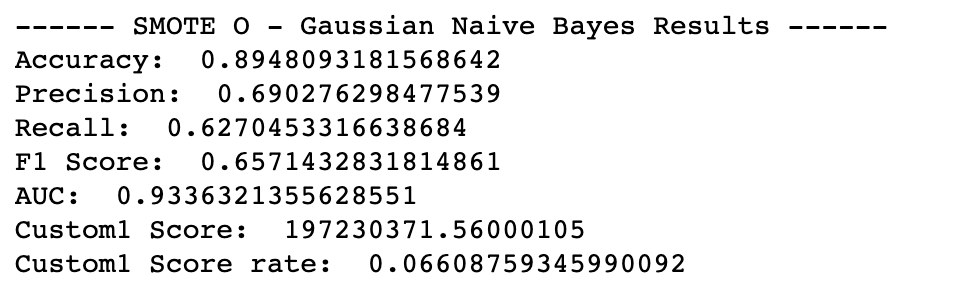

### Random Forest

##### SMOTE X

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': RandomForestClassifier(),
    'params': {
        'n_estimators': [100, 200, 500], 
        'max_depth': [5, 10, 15, None]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_lda, y_train)
print(f"Best parameters for RandomForest: {clf.best_params_}")
print(f"Best score for RandomForest: {clf.best_score_}")

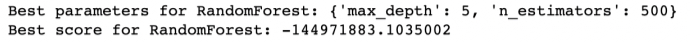

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - Random Forest Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

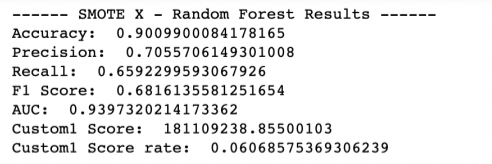

##### SMOTE O

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': RandomForestClassifier(),
    'params': {
        'n_estimators': [100, 200, 500], 
        'max_depth': [5, 10, 15, None]
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer) # cv값과 scoring은 적절하게 설정해야 합니다.
clf.fit(train_smote_lda, y_train_smote)
print(f"Best parameters for RandomForest: {clf.best_params_}")
print(f"Best score for RandomForest: {clf.best_score_}")

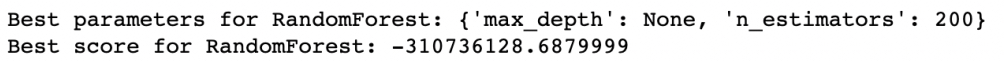

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE O - Random Forest Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

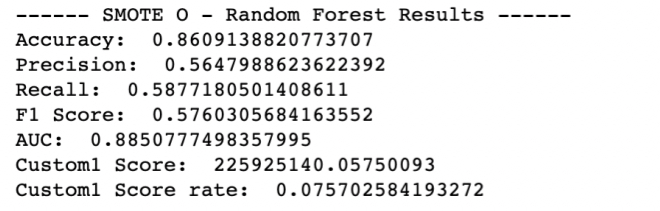

### KNN

##### SMOTE X

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': KNeighborsClassifier(),
    'params': {
        'n_neighbors': list(range(1,21)), 
        'weights': ['uniform', 'distance']
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer)
clf.fit(train_lda, y_train)
print(f"Best parameters for KNN: {clf.best_params_}")
print(f"Best score for KNN: {clf.best_score_}")

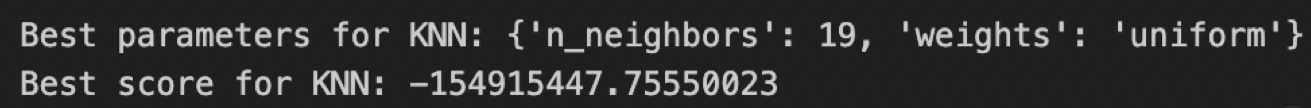

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - KNN Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

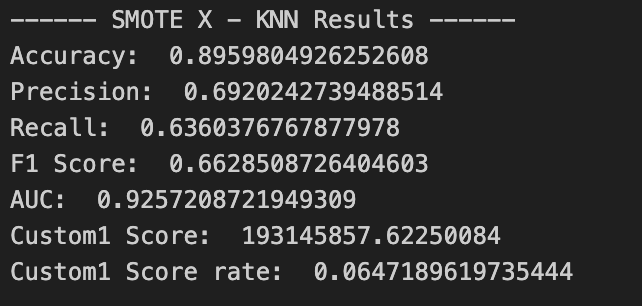

##### SMOTE O

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 분류 모델과 파라미터 그리드 설정
model_params = {
    'model': KNeighborsClassifier(),
    'params': {
        'n_neighbors': list(range(1,21)), 
        'weights': ['uniform', 'distance']
    }
}

custom_scorer = make_scorer(score_func=custom1_score, greater_is_better=False)

# GridSearchCV를 이용한 교차검증 및 하이퍼파라미터 튜닝
clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=custom_scorer)
clf.fit(train_smote_lda, y_train_smote)
print(f"Best parameters for KNN: {clf.best_params_}")
print(f"Best score for KNN: {clf.best_score_}")

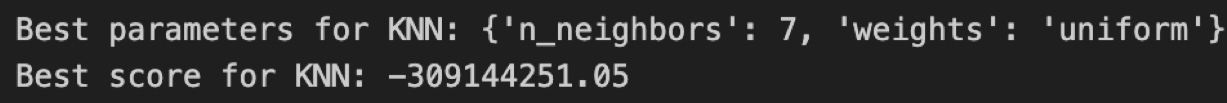

In [ ]:
# 최적의 파라미터로 학습된 모델로 테스트 세트 예측
predictions = clf.predict(test_smote_lda)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 확률 예측 값 계산
y_prob = clf.predict_proba(test_smote_lda)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# 성능평가
print("------ SMOTE X - KNN Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("AUC: ", roc_auc)
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

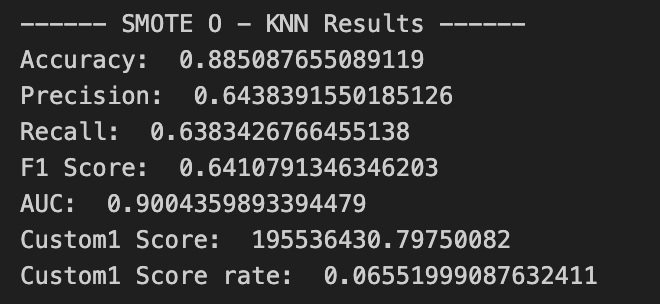

---

### Final Voting Model

In [11]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##### SMOTE X

In [12]:
# 모델 6개 정리
model1 = LogisticRegression(C = 10, penalty = 'l2', solver = 'sag')
model2 = GaussianNB()
model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                       n_estimators = 100, learning_rate = 0.01, 
                       max_depth = 3)
model3 = RandomForestClassifier(n_estimators = 500, max_depth = 5)
model5 = LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)
model7 = KNeighborsClassifier(n_neighbors = 19, weights='uniform')

models3 = [('model1', model1), ('model3', model3),('model4', model4)]
models5 = [('model1', model1), ('model3', model3),('model4', model4),
           ('model2', model2), ('model5', model5)]

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


##### 모델 3개로 voting : Logistic Regression + Random Forest + XGBoost

In [10]:
### Model 3개로 Voting

# Voting Model 제작
voting_model = VotingClassifier(estimators=models3, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_lda, y_train)

# Test set으로 모델 평가
predictions = voting_model.predict(test_lda)

print("------ SMOTE X - Hard Voting Model3 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

/Users/juheeyoon/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


------ SMOTE X - Hard Voting Model3 Results ------
Accuracy:  0.9008664861106028
Precision:  0.7050532724505327
Recall:  0.6590876753649583
F1 Score:  0.6812960538894854
Custom1 Score:  181184399.80750105
Custom1 Score rate:  0.06071093848804904


##### 모델 3개로 voting : Logistic Regression + XGBoost + LightGBM

In [ ]:
### Model 3개로 Voting
models32 = [('model1', model1), ('model5', model5),('model4', model4)]
# Voting Model 제작
voting_model = VotingClassifier(estimators=models32, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_lda, y_train)

# Test set으로 모델 평가
predictions = voting_model.predict(test_lda)

print("------ SMOTE X - Hard Voting Model3 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

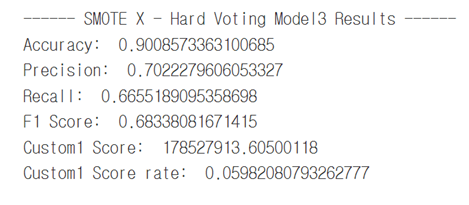

##### 모델 5개로 voting : Logistic Regression + Random Forest + XGBoost + Naive Bayes Classifier + LightGBM

In [ ]:
### Model 5개로 Voting

# Voting Model 제작
voting_model = VotingClassifier(estimators=models5, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_lda, y_train)

# Test set으로 모델 평가
predictions = voting_model.predict(test_lda)

print("------ SMOTE X - Hard Voting Model5 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

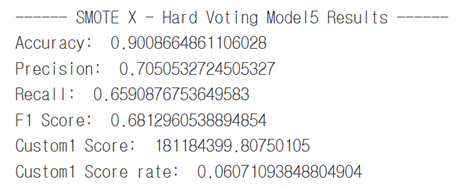

##### SMOTE O

In [ ]:
# 모델 6개 정리
model1 = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'liblinear')
model2 = GaussianNB()
model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                       n_estimators = 500, learning_rate = 0.1, 
                       max_depth = 3)
model3 = RandomForestClassifier(n_estimators = 200, max_depth = None)
model5 = LGBMClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 5)
model7 = KNeighborsClassifier(n_neighbors = 7, weights='uniform')

models3 = [('model1', model1), ('model3', model3),('model4', model4)]
models5 = [('model1', model1), ('model3', model3),('model4', model4),
           ('model2', model2), ('model5', model5)]

##### 모델 3개로 voting : Logistic Regression + Random Forest + XGBoost

In [ ]:
### Model 3개로 Voting
models32 = [('model1', model1), ('model5', model5),('model4', model4)]
# Voting Model 제작
voting_model = VotingClassifier(estimators=models3, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_smote_lda, y_train_smote)

# Test set으로 모델 평가
predictions = voting_model.predict(test_smote_lda)

print("------ SMOTE O - Hard Voting Model3 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

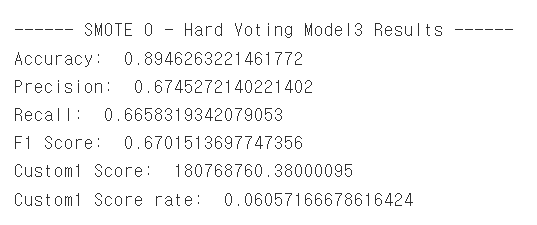

##### 모델 3개로 voting : Logistic Regression + XGBoost + LightGBM

In [ ]:
### Model 3개로 Voting

# Voting Model 제작
voting_model = VotingClassifier(estimators=models32, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_smote_lda, y_train_smote)

# Test set으로 모델 평가
predictions = voting_model.predict(test_smote_lda)

print("------ SMOTE O - Hard Voting Model3 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

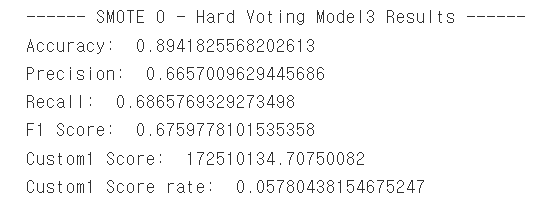

##### 모델 5개로 voting : Logistic Regression + Random Forest + XGBoost + Naive Bayes Classifier + LightGBM

In [ ]:
### Model 5개로 Voting

# Voting Model 제작
voting_model = VotingClassifier(estimators=models5, voting='hard')  # voting='hard'는 과반수 투표 방식을 의미

# 모델 학습
voting_model.fit(train_smote_lda, y_train_smote)

# Test set으로 모델 평가
predictions = voting_model.predict(test_smote_lda)

print("------ SMOTE O - Hard Voting Model5 Results ------")
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))
print("Custom1 Score: ",custom1_score(y_test, predictions))
print("Custom1 Score rate: ",custom1_score(y_test, predictions)/X_test['loan_amnt'].sum())

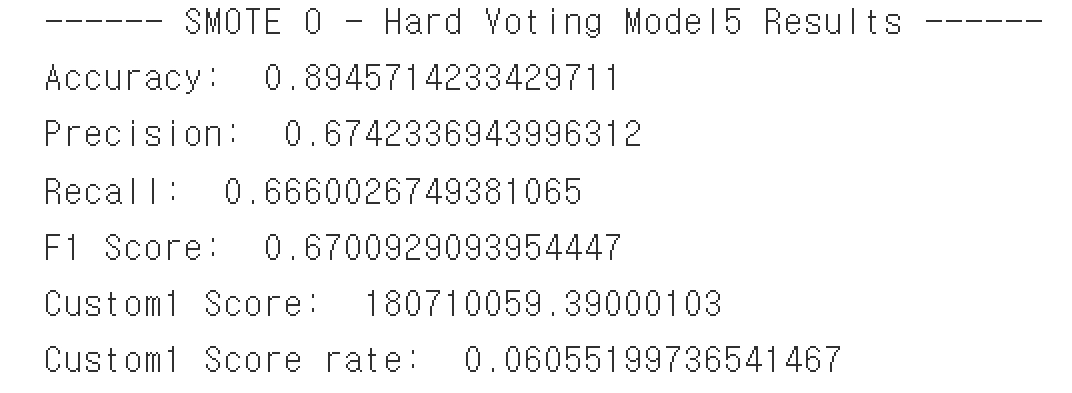